# #Short description about columns data

1)id: An identifier for each individual in the dataset.
2)gender: The gender of the individual (Male/Female).
3)age: The age of the individual.
4)hypertension: Whether the individual has hypertension (1 if true, 0 if false).
5)heart_disease: Whether the individual has heart disease (1 if true, 0 if false).
6)ever_married: Whether the individual has ever been married (Yes/No).
7)work_type: The type of work the individual is involved in (e.g., Private, Self-employed).
8)Residence_type: The type of residence of the individual (Urban/Rural).
9)avg_glucose_level: The average glucose level in the individual's blood.
10)bmi: The Body Mass Index (BMI) of the individual.s
11)smoking_status: The smoking status of the individual (e.g., formerly smoked, never smoked).
12)stroke: The target variable indicating whether the individual had a stroke (1 if true, 0 if false).

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Dataset Loading

In [2]:
data=pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

# Data Understanding

In [3]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
data.shape

(5110, 12)

In [5]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
data.describe(include=object)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


# Data Cleaning

# Handle missing values

In [9]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

got 201 null values

let's visualize the BMI column

[]

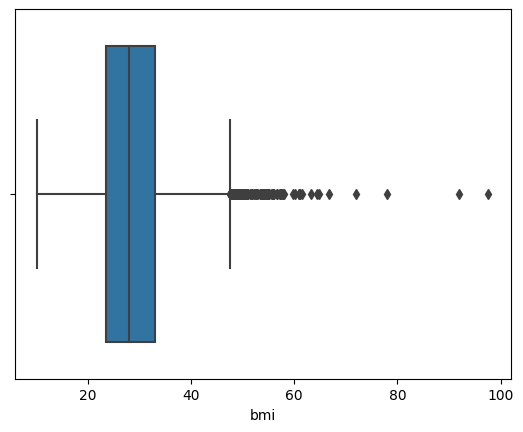

In [10]:
sns.boxplot(x='bmi',data=data)
plt.plot()

In [11]:
data['bmi']=data['bmi'].fillna(data['bmi'].median())

In [12]:
data.isnull().sum().sum()

0

In [13]:
# some bmi values are too high , so we need to observe
#Underweight: Less than 18.5.
#Optimum range: 18.5 to 24.9.
#Overweight: 25 to 29.9.
#Class I obesity: 30 to 34.9.
#Class II obesity: 35 to 39.9.
#Class III obesity: More than 40.

In [14]:
data.duplicated().sum()

0

In [15]:
data.drop('id',axis=1,inplace=True)

In [16]:
data.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [17]:
data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [18]:
data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [19]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [20]:
data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [21]:
data['smoking_status'].unique()


array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [22]:
#Checking Outliers

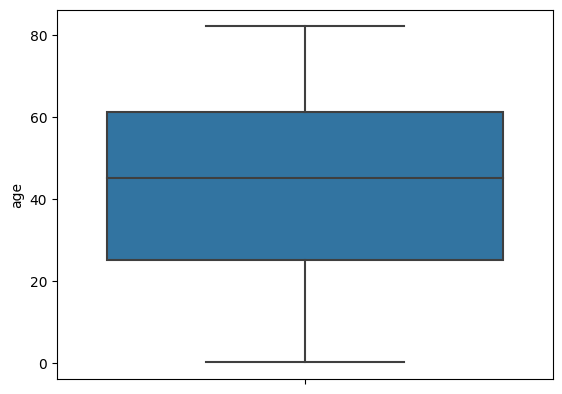

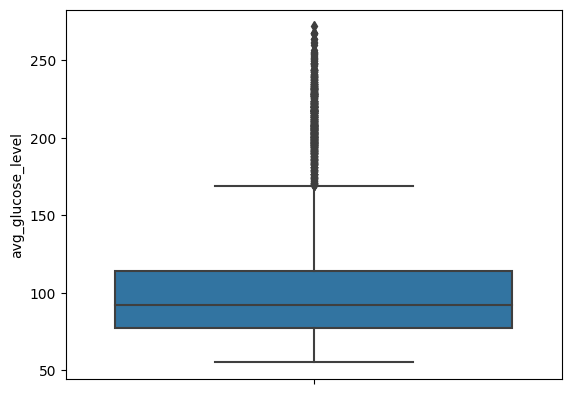

In [23]:
sns.boxplot(data=data,y='age')
plt.show()
sns.boxplot(data=data,y='avg_glucose_level')
plt.show()

# EDA

In [24]:
#UNIVARIATE ANALYSIS

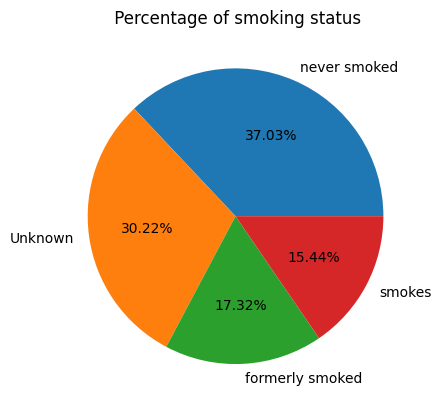

In [25]:
smoking_status_index=data.smoking_status.value_counts().index
#print(smoking_status_index)
smoking_status_value=data.smoking_status.value_counts().values
#print(smoking_status_value)
plt.pie(smoking_status_value,labels=smoking_status_index,autopct="%1.2f%%")
plt.title(' Percentage of smoking status')
plt.show()

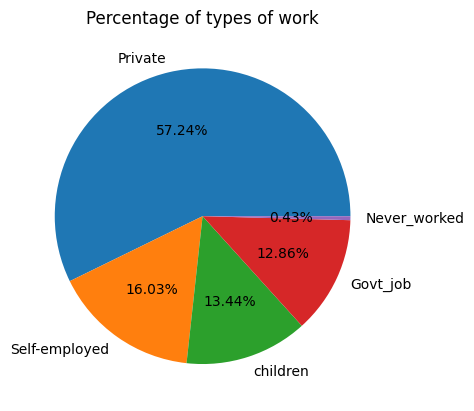

In [26]:

work_type_index=data.work_type.value_counts().index
#print(work_type_index)
work_type_value=data.work_type.value_counts().values
#print(work_type_value)
plt.pie(work_type_value,labels=work_type_index,autopct="%1.2f%%")
plt.title("Percentage of types of work")
plt.show()

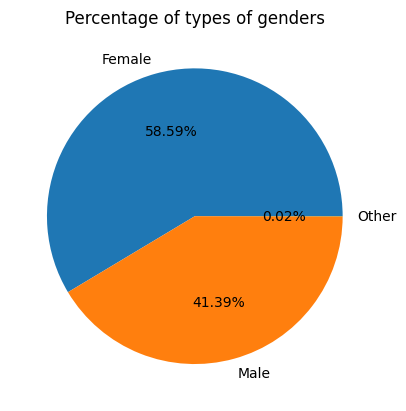

In [27]:

gender_index=data.gender.value_counts().index
#print(gender_index)
gender_value=data.gender.value_counts().values
#print(gender_value)
plt.pie(gender_value,labels=gender_index,autopct="%1.2f%%")
plt.title("Percentage of types of genders")
plt.show()

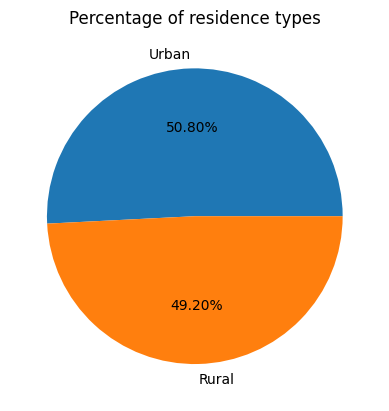

In [28]:
Residence_type_index=data.Residence_type.value_counts().index
#print(Residence_type_index)
Residence_type_value=data.Residence_type.value_counts().values
#print(Residence_type_value)
plt.pie(Residence_type_value,labels=Residence_type_index,autopct="%1.2f%%")
plt.title("Percentage of residence types")
plt.show()

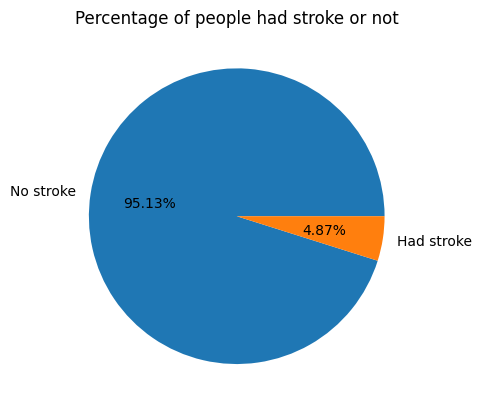

In [29]:
patient=data.copy()
patient['stroke']=patient['stroke'].replace(1,'Had stroke ')
patient['stroke']=patient['stroke'].replace(0,'No stroke')
stroke_index=patient.stroke.value_counts().index
#print(stroke_index)
stroke_value=patient.stroke.value_counts().values
#print(stroke_value)
plt.pie(stroke_value,labels=stroke_index,autopct="%1.2f%%")
plt.title("Percentage of people had stroke or not")
plt.show()

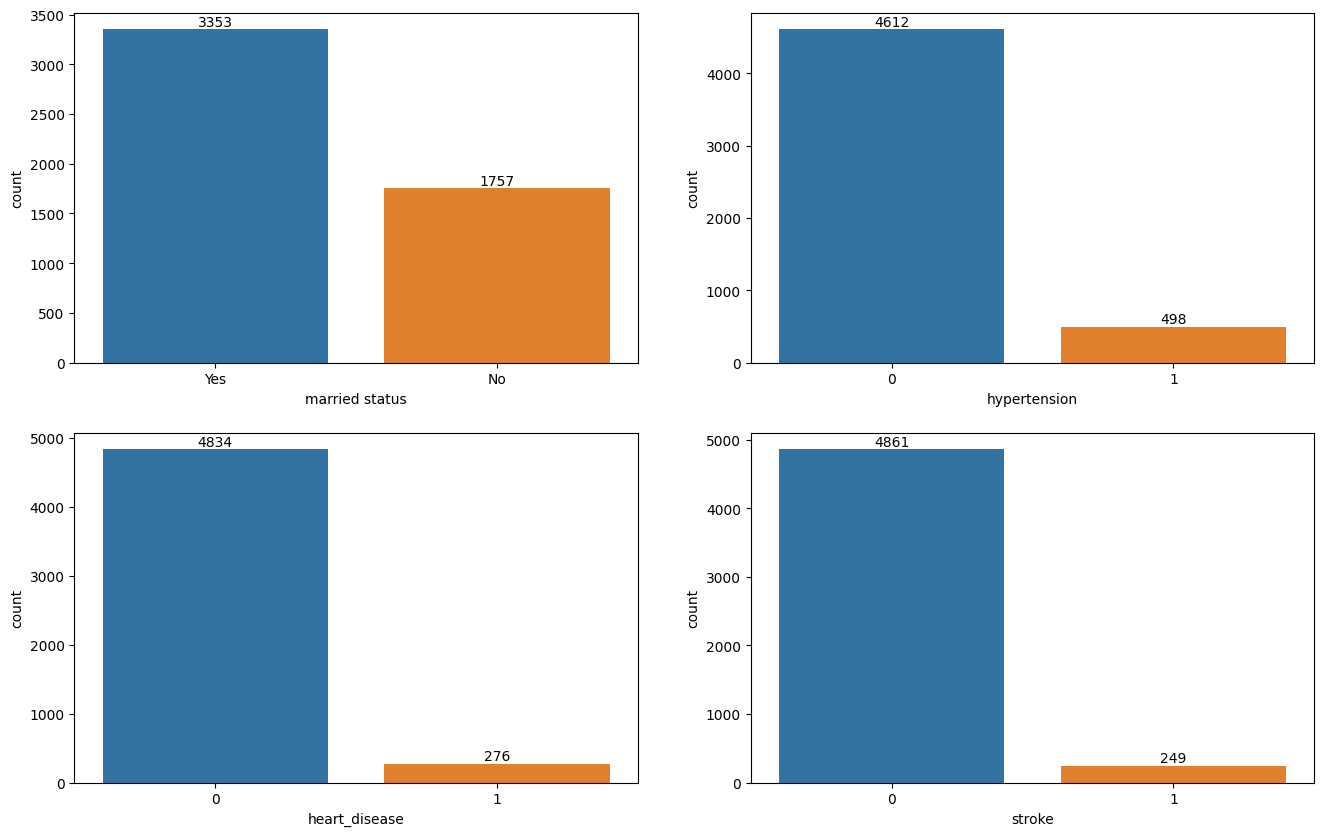

In [30]:
plt.figure(figsize=(16, 10))
plt.subplot(2, 2,1)
a=sns.countplot(x='ever_married',data=data)
plt.xlabel("married status")
for label in a.containers:
  a.bar_label(label)
plt.subplot(2,2,2)
a=sns.countplot(x='hypertension',data=data)
for label in a.containers:
  a.bar_label(label)
plt.subplot(2, 2,3)
a=sns.countplot(x='heart_disease',data=data)
for label in a.containers:
  a.bar_label(label)
plt.subplot(2,2,4)
a=sns.countplot(x='stroke',data=data)
for label in a.containers:
  a.bar_label(label)
plt.show()



Data is highly immbalanced

In [31]:
import scipy.stats as stats

In [32]:
bmi_data = data['bmi']
glucose_data=data['avg_glucose_level']
age_data=data['age']

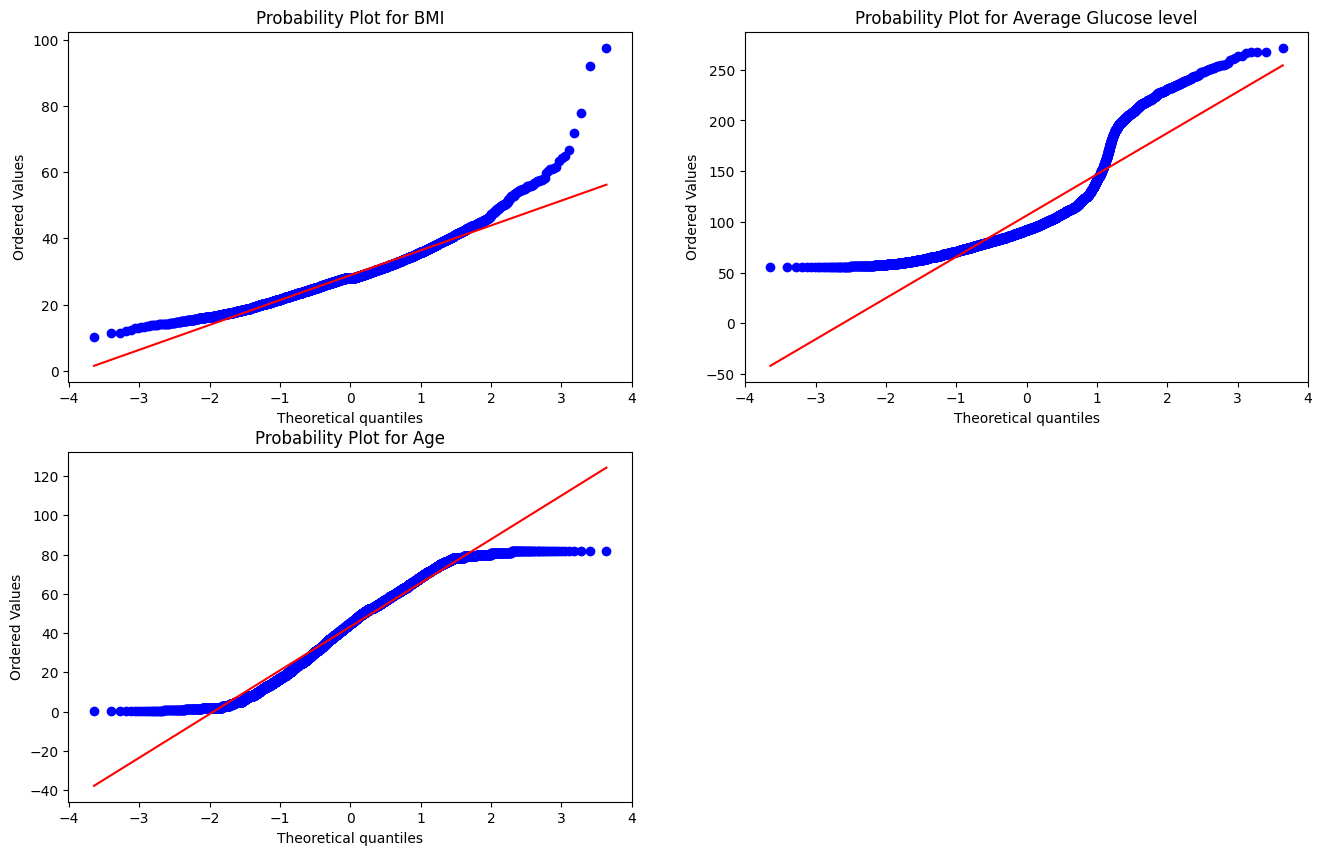

In [33]:
plt.figure(figsize=(16, 10))
plt.subplot(2, 2,1)
stats.probplot(bmi_data, plot=plt,dist="norm")
plt.title("Probability Plot for BMI")
plt.subplot(2, 2,2)
stats.probplot(glucose_data, plot=plt,dist="norm")
plt.title("Probability Plot for Average Glucose level")
plt.subplot(2,2,3)
stats.probplot(age_data, plot=plt,dist="norm")
plt.title("Probability Plot for Age")
plt.show()

In [34]:
from scipy.stats import shapiro


stats,p_value = shapiro(data['bmi'])
print(f'Shapiro-Wilk test for BMI:  p-value={p_value}')
if p_value <= 0.05:
    print("Reject the null hypothesis: The BMI data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: The BMI data may be normally distributed.")


stat, p_value = shapiro(data['avg_glucose_level'])
print(f'Shapiro-Wilk test for Average Glucose Level:  p-value={p_value}')
if p_value <= 0.05:
    print("Reject the null hypothesis: The Average Glucose Level data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: The Average Glucose Level data may be normally distributed.")


stat, p_value = shapiro(data['age'])
print(f'Shapiro-Wilk test for Age:  p-value={p_value}')
if p_value <= 0.05:
    print("Reject the null hypothesis: The Age data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: The Age data may be normally distributed.")


Shapiro-Wilk test for BMI:  p-value=2.289882699900302e-38
Reject the null hypothesis: The BMI data is not normally distributed.
Shapiro-Wilk test for Average Glucose Level:  p-value=0.0
Reject the null hypothesis: The Average Glucose Level data is not normally distributed.
Shapiro-Wilk test for Age:  p-value=1.3734279099703845e-32
Reject the null hypothesis: The Age data is not normally distributed.


In [35]:
#2.29*10^-38

In [36]:
numbers=data.select_dtypes(include=['number'])
numbers.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.324296,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.158293,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.036916,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.166876,0.131945
bmi,0.324296,0.158293,0.036916,0.166876,1.000000,0.036110
stroke,0.245257,0.127904,0.134914,0.131945,0.036110,1.000000


Text(0.5, 1.0, 'Heatmap Correlation')

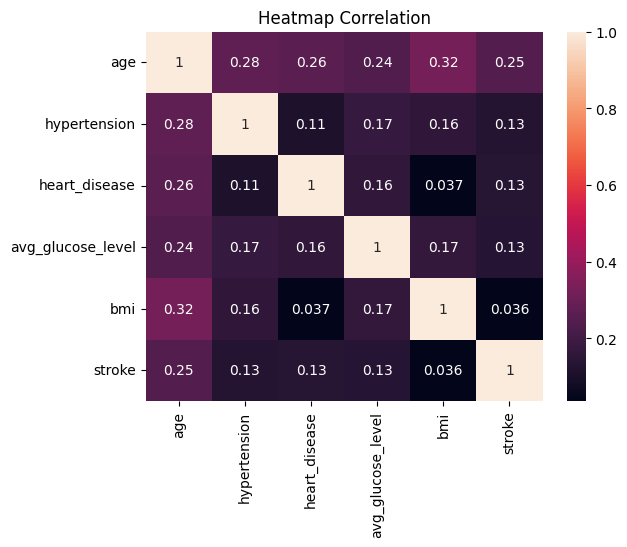

In [37]:
numbers=data.select_dtypes(include=['number'])
sns.heatmap(numbers.corr(),annot=True)
plt.title("Heatmap Correlation")

Age:
1)Age is positively correlated with hypertension, heart disease, average glucose level, and BMI
2)The strongest positive correlation is with BMI
Hypertension :
1)Hypertension is positively correlated with age and average glucose level
2)The strongest positive correlation is with age
Heart Disease:
1)Heart disease shows positive correlations with age and stroke
2)The strongest positive correlation is with age
Average Glucose Level :
1)Average glucose level is positively correlated with age and hypertension
2)The strongest positive correlation is with age
Stroke:
1)Stroke shows positive correlations with age, hypertension, and heart disease
The strongest positive correlation is with age

Note:
1)Age appears to have a notable influence on various health-related factors, with positive correlations with hypertension, heart disease, average glucose level, BMI, and stroke
2)
BMI has a positive correlation with age, suggesting that as age increases, BMI tends to increase as well

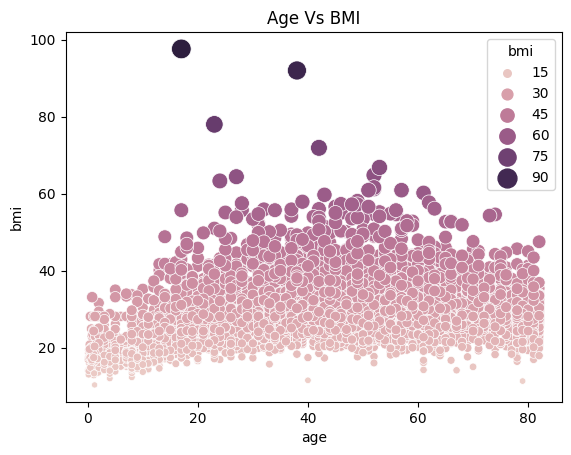

In [38]:
sns.scatterplot(data=data,x='age',y='bmi',size='bmi',hue='bmi',sizes=(20, 200))
plt.title("Age Vs BMI")
plt.show()

Individuals aged between 20 to 60 years often exhibit higher BMI values

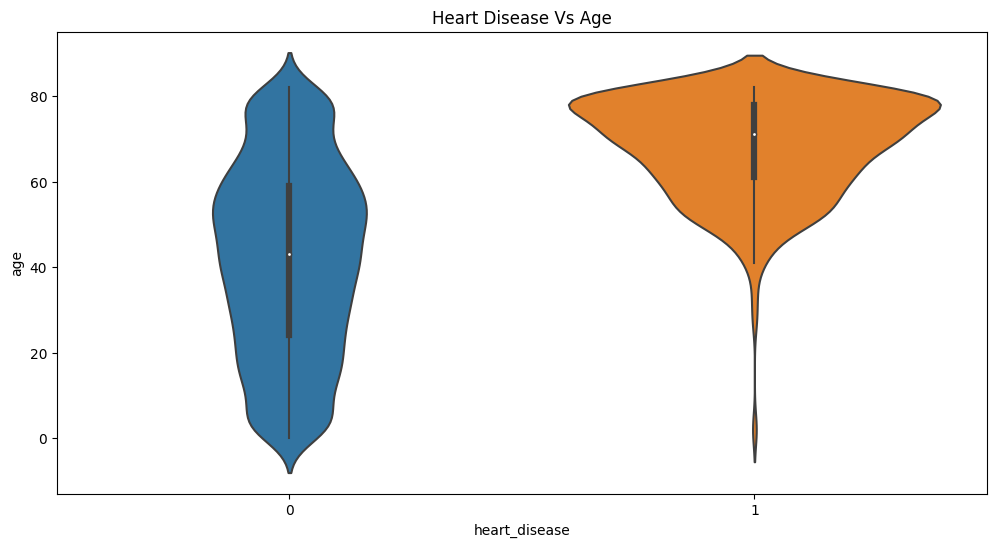

In [39]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x="heart_disease", y="age")
plt.title("Heart Disease Vs Age")
plt.show()

According to this dataset, the likelihood of developing heart diseases  increases significantly above the age of 20

In [40]:
data.groupby(['gender','stroke'])['stroke'].count()

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Other   0            1
Name: stroke, dtype: int64

female have maximum stroke count

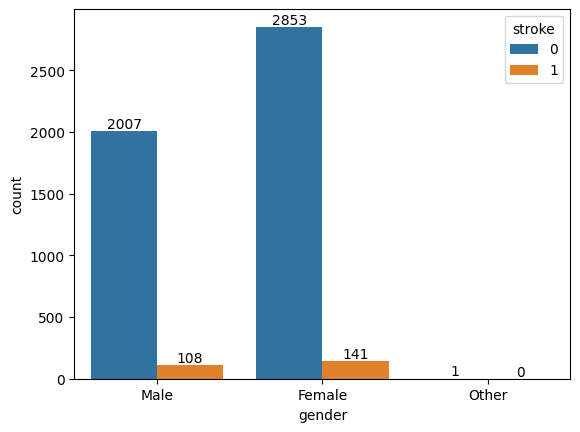

In [41]:
a=sns.countplot(x='gender',hue='stroke',data=data)
for label in a.containers:
    a.bar_label(label)


chance's of getting heart disease is more above age of 40 according to this dataset

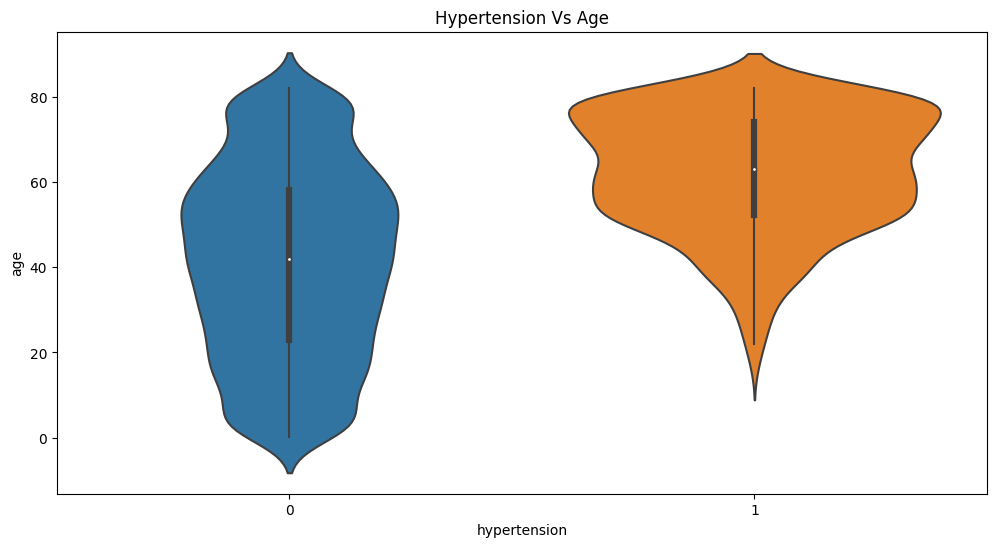

In [42]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x="hypertension", y="age")
plt.title("Hypertension Vs Age")
plt.show()

According to this dataset, the likelihood of developing hypertension  increases significantly above the age of 20

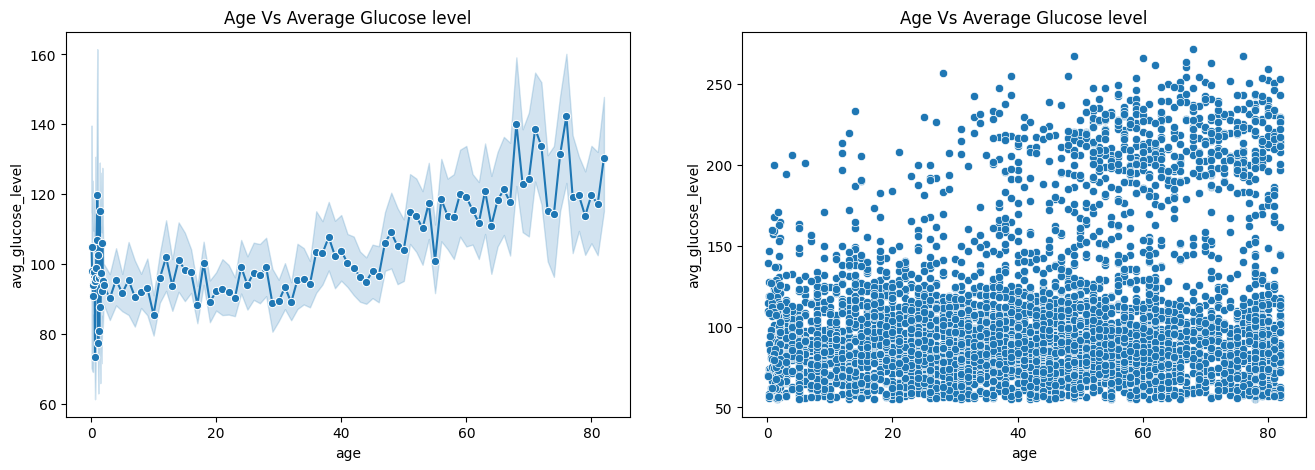

In [43]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2,1)
sns.lineplot(data=data,x='age',y='avg_glucose_level',marker='o')
plt.title('Age Vs Average Glucose level')
plt.subplot(1, 2,2)
sns.scatterplot(data=data, x='age',y='avg_glucose_level')
plt.title('Age Vs Average Glucose level')
plt.show()

According to the data, patients above the age of 40 exhibit higher average glucose levels

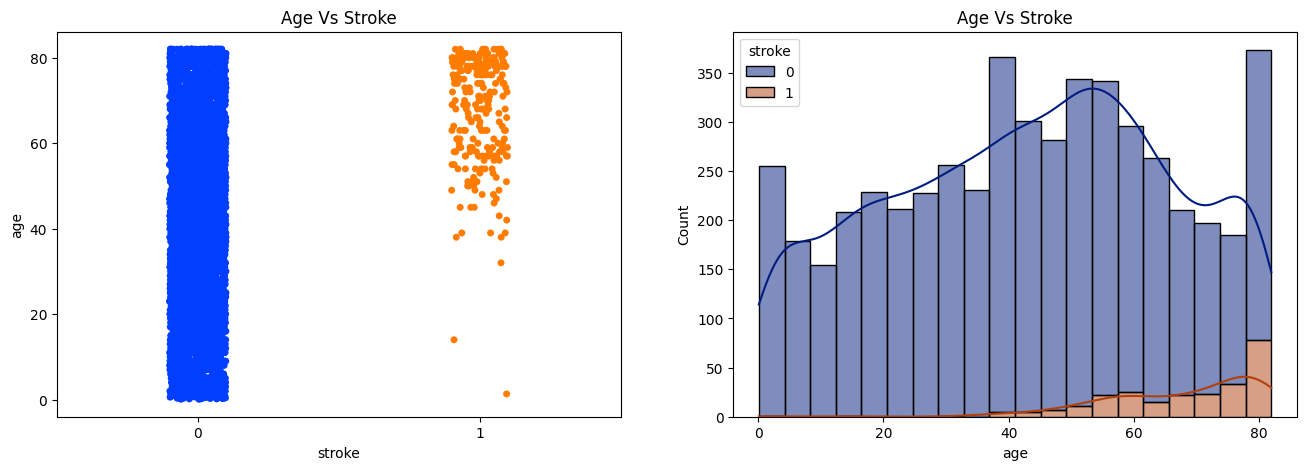

In [44]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2,1)
sns.stripplot(x = "stroke", y = "age", palette = "bright", data=data)
plt.title('Age Vs Stroke')
plt.subplot(1, 2,2)
sns.histplot(data,x='age',hue='stroke',kde=True,multiple="stack",palette='dark')
plt.title('Age Vs Stroke')
plt.show()

Increasing after the age of 40, the stroke rate demonstrates a notable rise according to the data

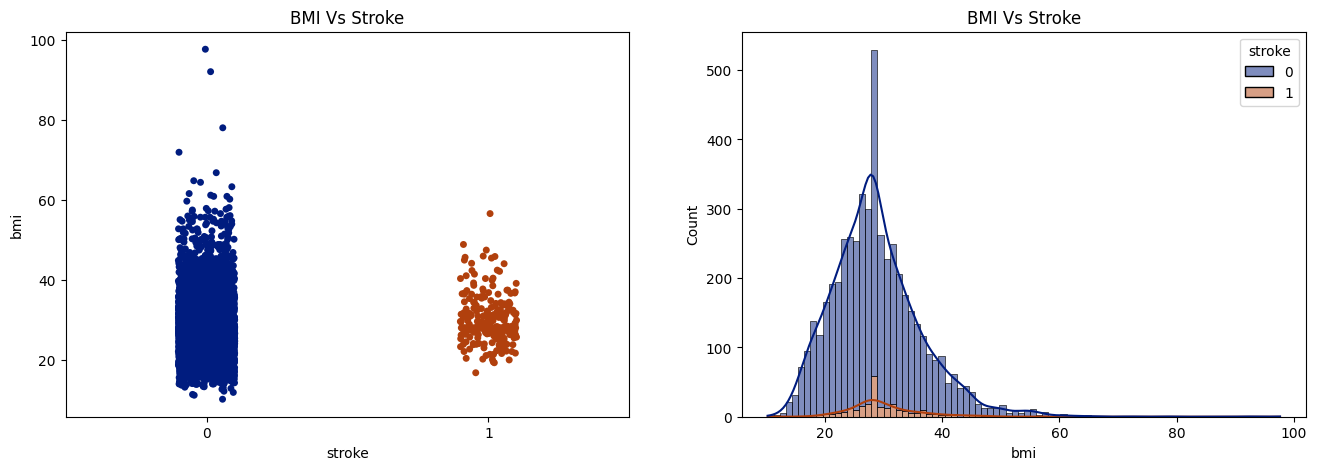

In [45]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2,1)
sns.stripplot( data=data,x = "stroke", y = "bmi",palette='dark')
plt.title('BMI Vs Stroke')
plt.subplot(1, 2,2)
sns.histplot(data,x='bmi',hue='stroke',kde=True,multiple="stack",palette='dark')
plt.title('BMI Vs Stroke')
plt.show()

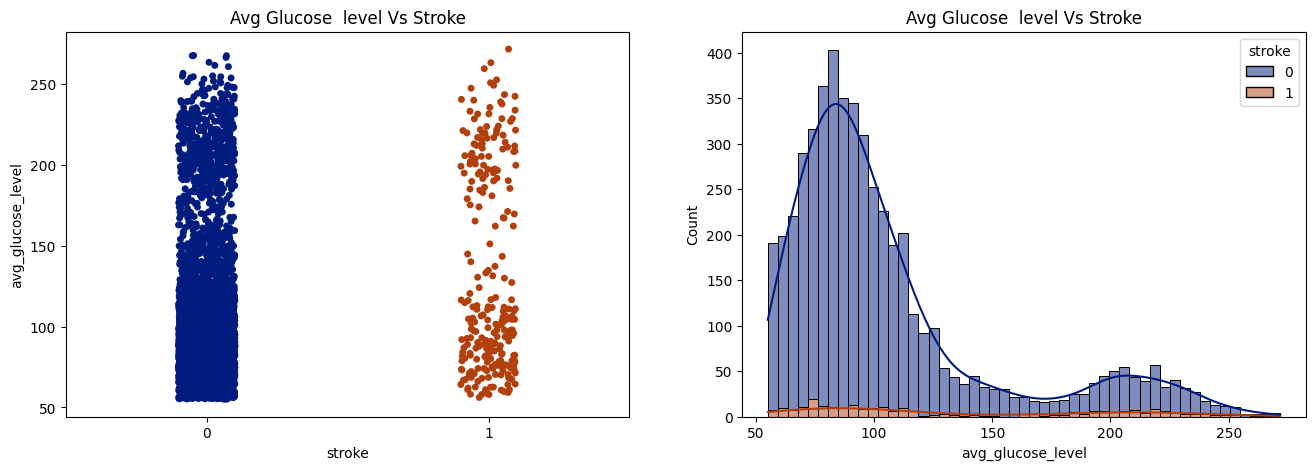

In [46]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2,1)
sns.stripplot( data=data,x = "stroke", y = "avg_glucose_level",palette='dark')
plt.title('Avg Glucose  level Vs Stroke')
plt.subplot(1, 2,2)
sns.histplot(data,x='avg_glucose_level',hue='stroke',kde=True,multiple="stack",palette='dark')
plt.title('Avg Glucose  level Vs Stroke')
plt.show()

Patients who got stroke were either with low glucose level or high glucose level but low glucose level patients have more probability of getting stroke

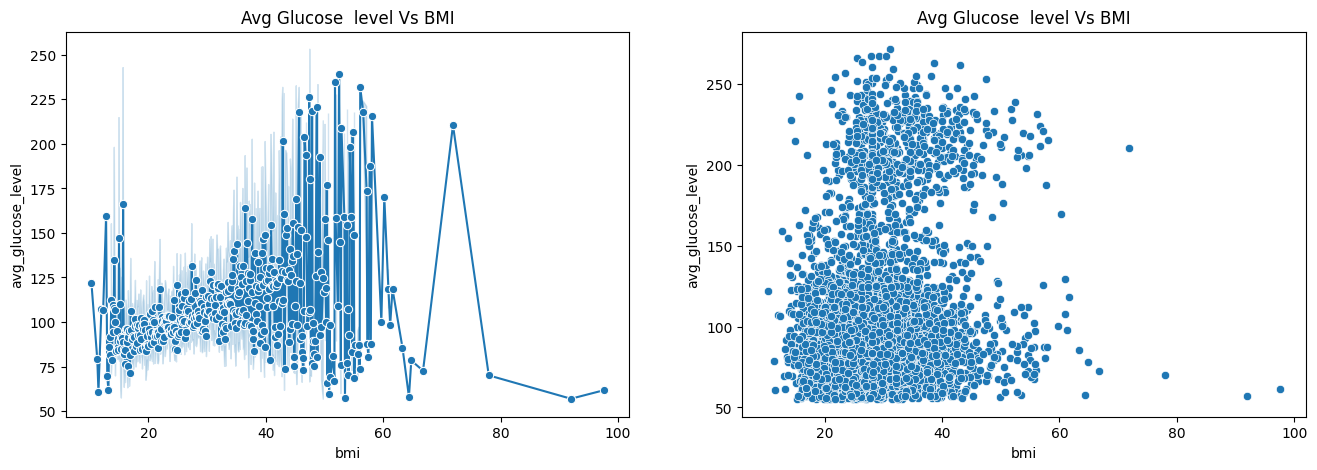

In [47]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2,1)
sns.lineplot(data=data,x='bmi',y='avg_glucose_level',marker='o')
plt.title('Avg Glucose  level Vs BMI')
plt.subplot(1, 2,2)
sns.scatterplot(data=data, x='bmi',y='avg_glucose_level')
plt.title('Avg Glucose  level Vs BMI')
plt.show()

1)from the given data we can observe that people having bmi between 40 to 60 have high avg Glucose level
2) we can also observe that bmi greater than  75-78 have low avg Glucose level

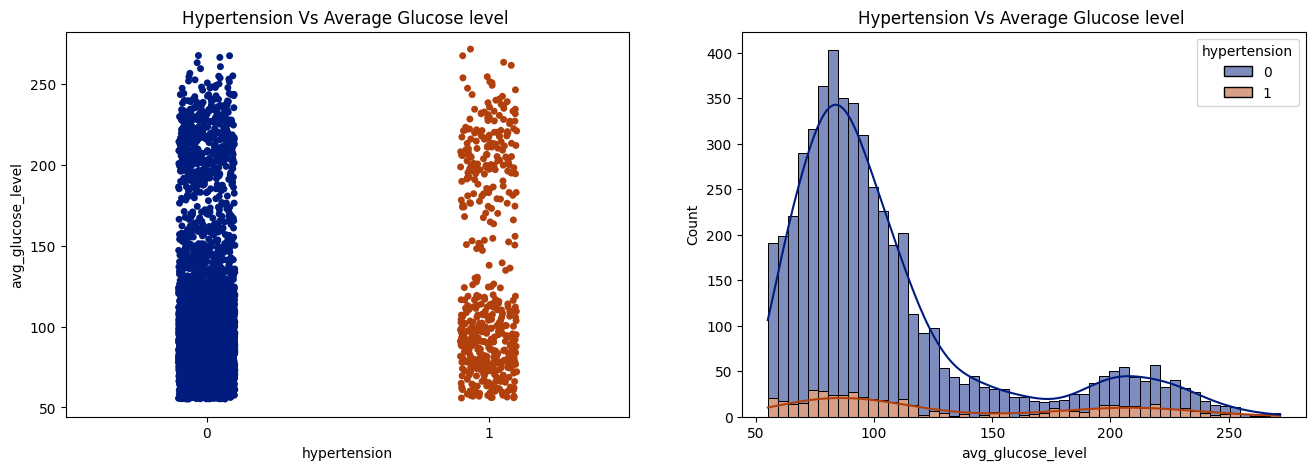

In [48]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2,1)
sns.stripplot( data=data,x = "hypertension", y = "avg_glucose_level",palette='dark')
plt.title('Hypertension Vs Average Glucose level ')
plt.subplot(1, 2,2)
sns.histplot(data,x='avg_glucose_level',hue='hypertension',kde=True,multiple="stack",palette='dark')
plt.title('Hypertension Vs Average Glucose level ')
plt.show()

people having more or high Glucose got maximum Hypertension

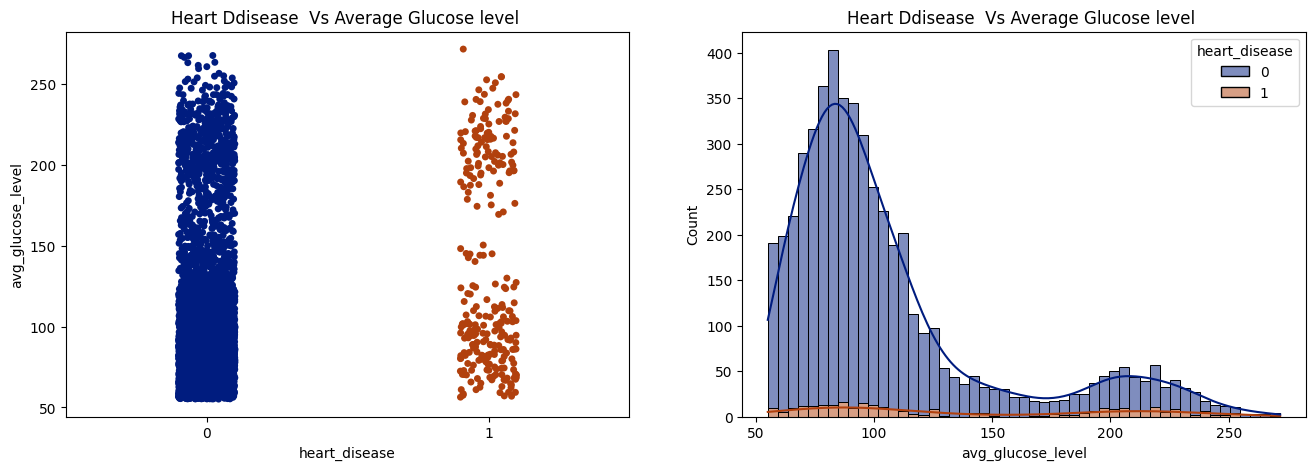

In [49]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2,1)
sns.stripplot( data=data,x = "heart_disease", y = "avg_glucose_level",palette='dark')
plt.title('Heart Ddisease  Vs Average Glucose level ')
plt.subplot(1, 2,2)
sns.histplot(data,x='avg_glucose_level',hue='heart_disease',kde=True,multiple="stack",palette='dark')
plt.title('Heart Ddisease  Vs Average Glucose level ')
plt.show()

people having more or high Glucose got maximum Heart disease  

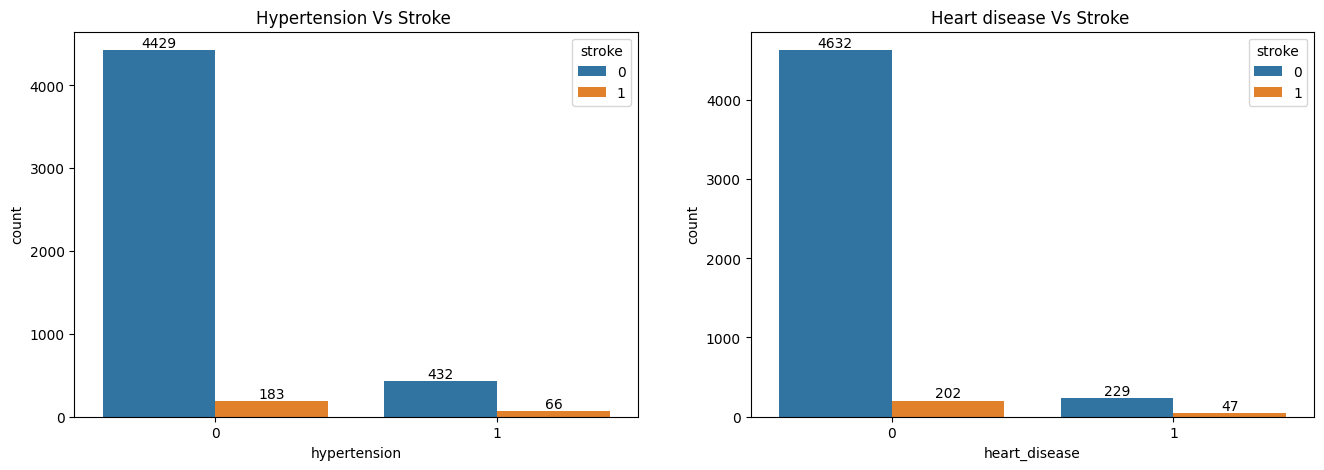

In [50]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2,1)
a=sns.countplot(x='hypertension',hue='stroke',data=data)
for label in a.containers:
    a.bar_label(label)
plt.title('Hypertension Vs Stroke ')
plt.subplot(1, 2,2)
a=sns.countplot(x='heart_disease',hue='stroke',data=data)
for label in a.containers:
    a.bar_label(label)
plt.title('Heart disease Vs Stroke ')
plt.show()

Data shows that even patients who don't have heart disease or hypertension still got strokes

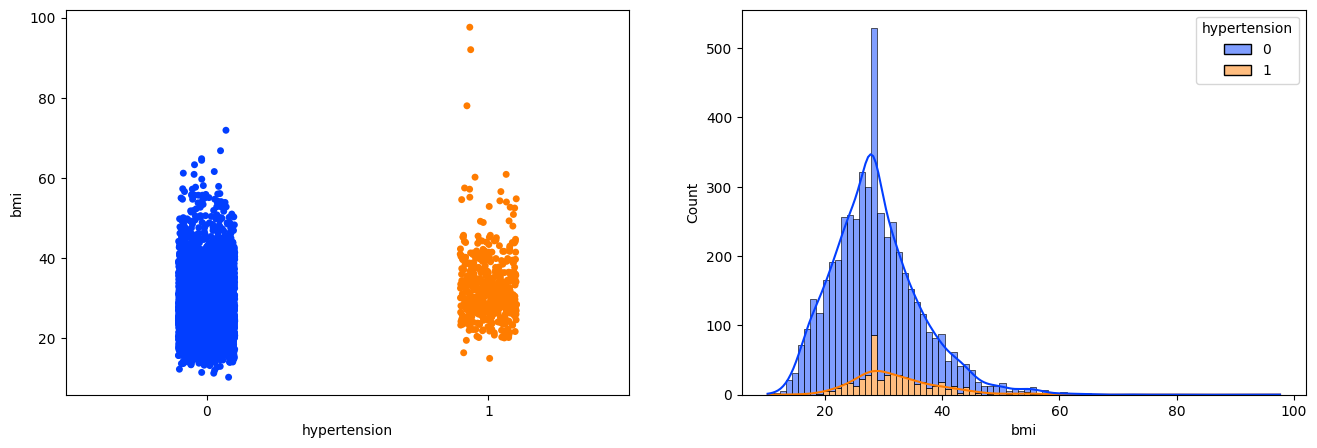

In [51]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2,1)
sns.stripplot( data=data,x = "hypertension", y = "bmi",palette='bright')
plt.subplot(1, 2,2)
sns.histplot(data,x='bmi',hue='hypertension',kde=True,multiple="stack",palette='bright')
plt.show()

1)Most stroke patients typically have a BMI in the range of 20-40
2)According to this dataset, the chances of developing hypertension start from 20.

<Axes: xlabel='gender', ylabel='bmi'>

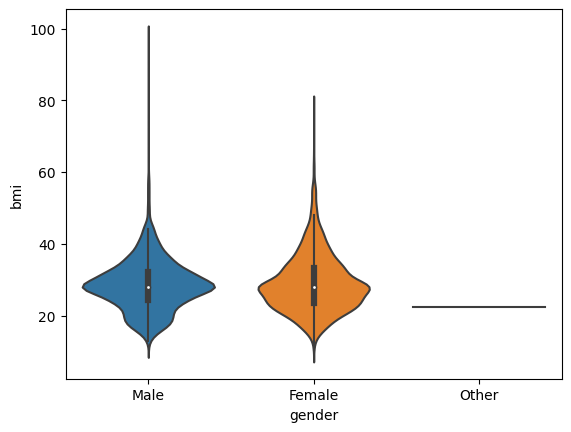

In [52]:
sns.violinplot(x ='gender', y ='bmi', data = data)

Males have a higher BMI

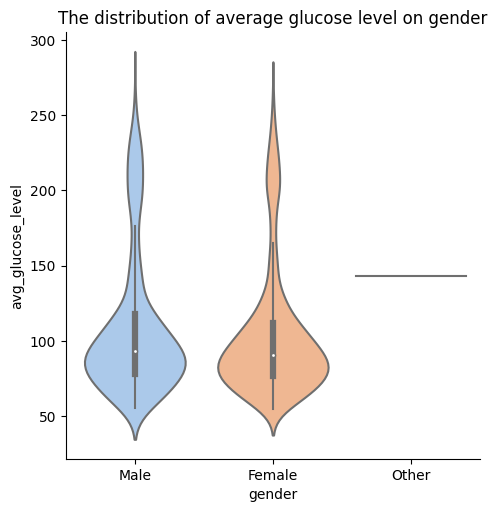

In [53]:
sns.catplot(data=data, x="gender", y="avg_glucose_level", kind="violin", palette="pastel")
plt.title('The distribution of average glucose level on gender');

Males have a higher average glucose level than females

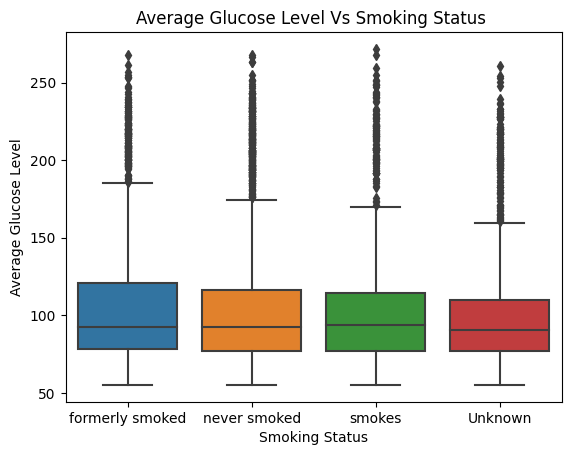

In [54]:
sns.boxplot(x='smoking_status', y='avg_glucose_level', data=data)
plt.xlabel('Smoking Status')
plt.ylabel('Average Glucose Level')
plt.title("Average Glucose Level Vs Smoking Status ")
plt.show()

Formerly smoking individuals have a higher average glucose level.

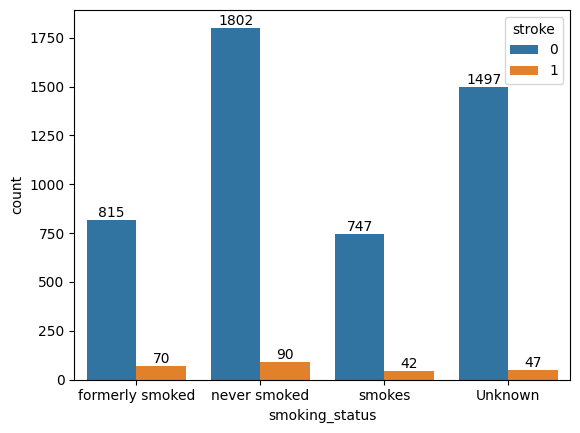

In [55]:
a=sns.countplot(data=data,x='smoking_status',hue='stroke')
for label in a.containers:
    a.bar_label(label)



Individuals who have never smoked experience the maximum number of strokes due to highly imbalanced data

Text(0.5, 1.0, 'Work type Vs')

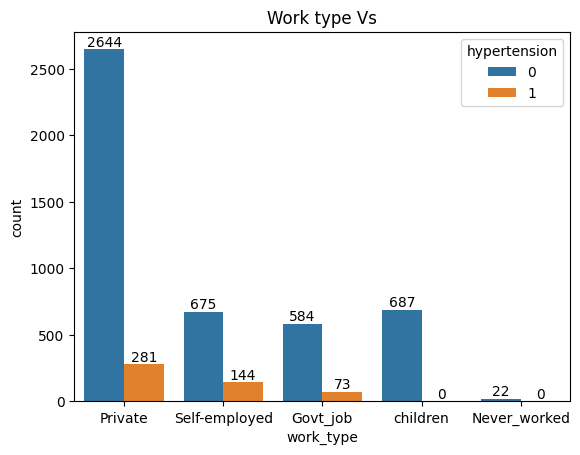

In [56]:
a=sns.countplot(x='work_type',hue='hypertension',data=data)
for label in a.containers:
    a.bar_label(label)
plt.title("Work type Vs")

People working in private sectors have the highest incidence of hypertension

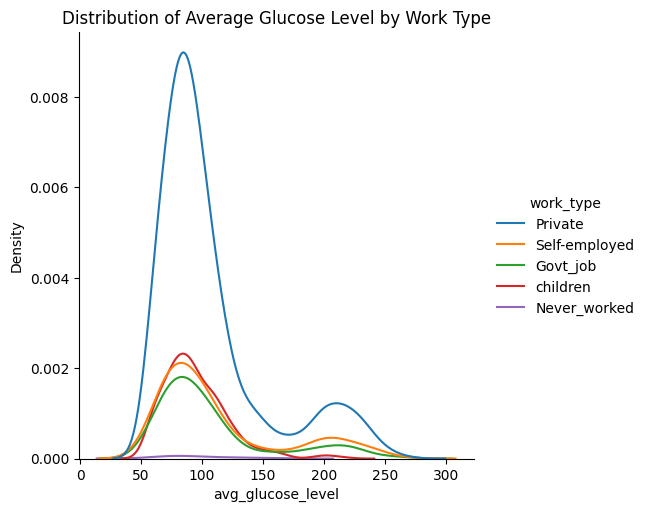

In [57]:
sns.displot(data,x='avg_glucose_level',hue='work_type',kind='kde')
plt.title('Distribution of Average Glucose Level by Work Type')
plt.show()

The average glucose level is reported to be higher in individuals working in private sectors

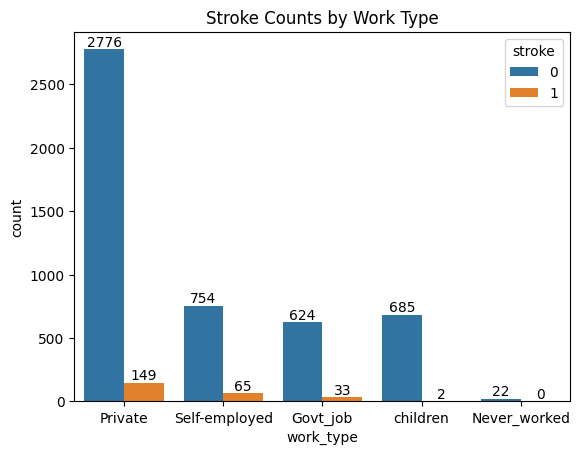

In [58]:
a=sns.countplot(data=data,x='work_type',hue='stroke')
for label in a.containers:
    a.bar_label(label)
plt.title('Stroke Counts by Work Type')
plt.show()

According to the dataset, individuals working in the private sector have the highest incidence of strokes among the different work types

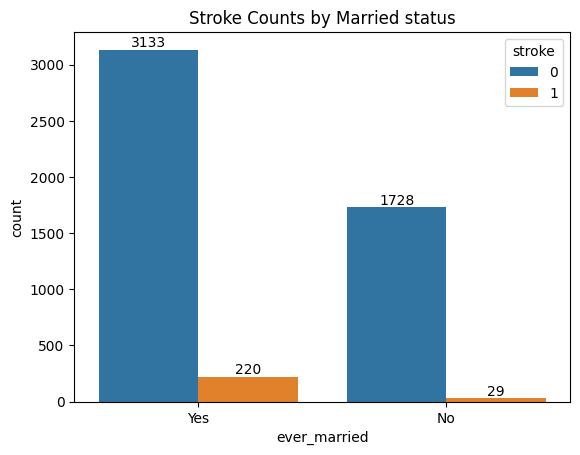

In [59]:
a=sns.countplot(x='ever_married', hue='stroke', data=data)
for label in a.containers:
    a.bar_label(label)
plt.title('Stroke Counts by Married status')
plt.show()

In [60]:
data.groupby(['ever_married','stroke'])['stroke'].count()

ever_married  stroke
No            0         1728
              1           29
Yes           0         3133
              1          220
Name: stroke, dtype: int64

Married individuals experience the highest incidence of strokes

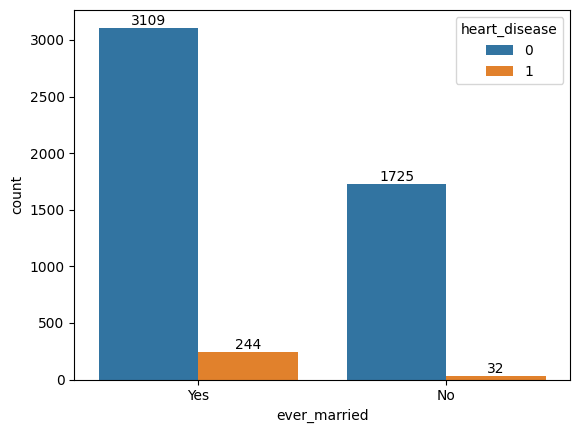

In [61]:
a=sns.countplot(x='ever_married',hue='heart_disease',data=data)
for label in a.containers:
    a.bar_label(label)

Married individuals have a higher incidence of heart disease

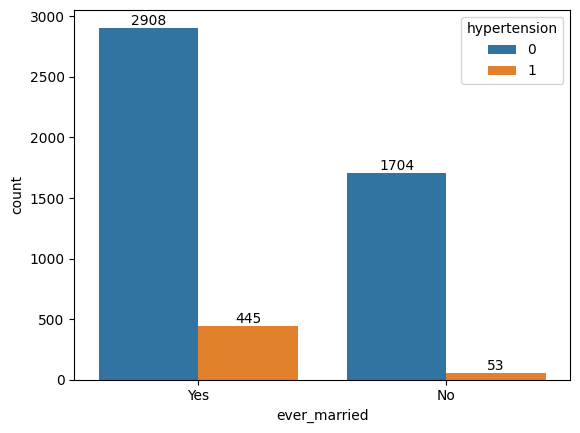

In [62]:
a=sns.countplot(x='ever_married',hue='hypertension',data=data)
for label in a.containers:
    a.bar_label(label)

Married individuals have a higher incidence of hypertension

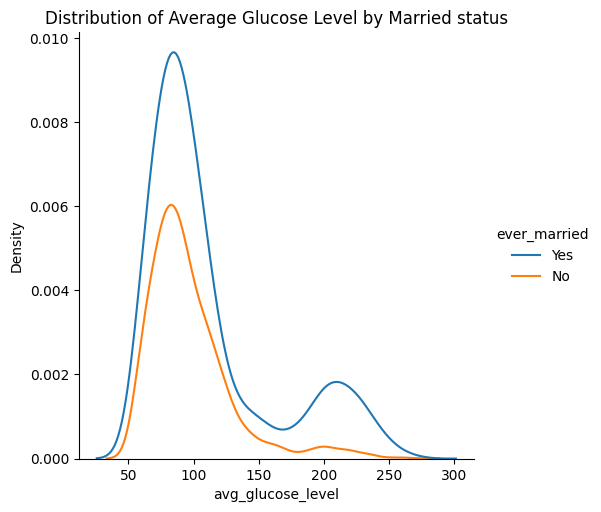

In [63]:
 sns.displot(data,x='avg_glucose_level',hue='ever_married',kind='kde')
plt.title('Distribution of Average Glucose Level by Married status')
plt.show()

Married individuals report a higher average glucose level

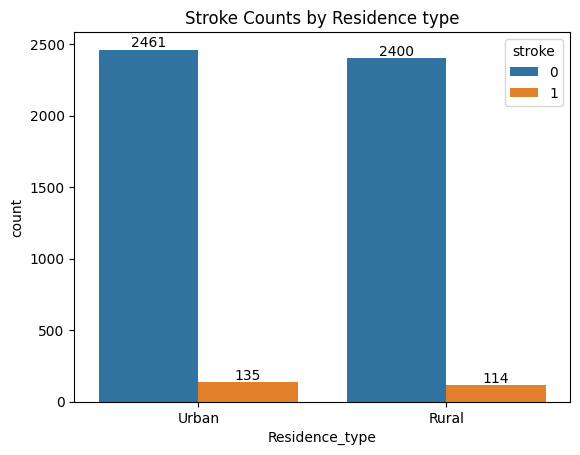

In [64]:
a=sns.countplot(data=data,x='Residence_type',hue='stroke')
for label in a.containers:
    a.bar_label(label)
plt.title('Stroke Counts by Residence type')
plt.show()

Urban people have slightly more strokes than rural individuals.

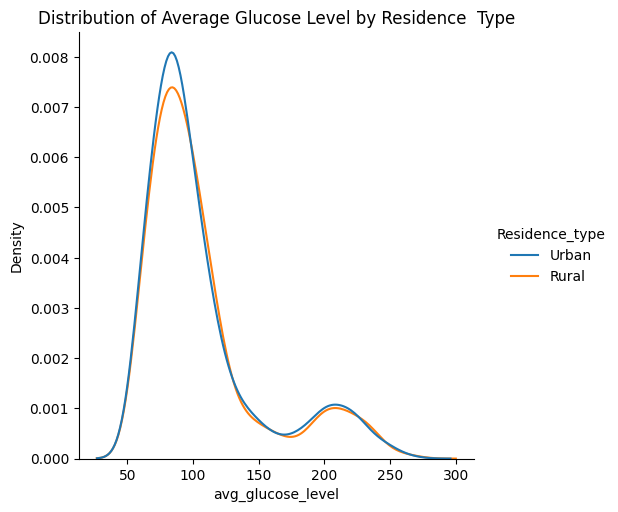

In [65]:
sns.displot(data,x='avg_glucose_level',hue='Residence_type',kind='kde')
plt.title('Distribution of Average Glucose Level by Residence  Type')
plt.show()

Urban individuals have slightly higher average glucose levels than rural residents

BIVARIANT PLOT

Analysis of data based on strokes

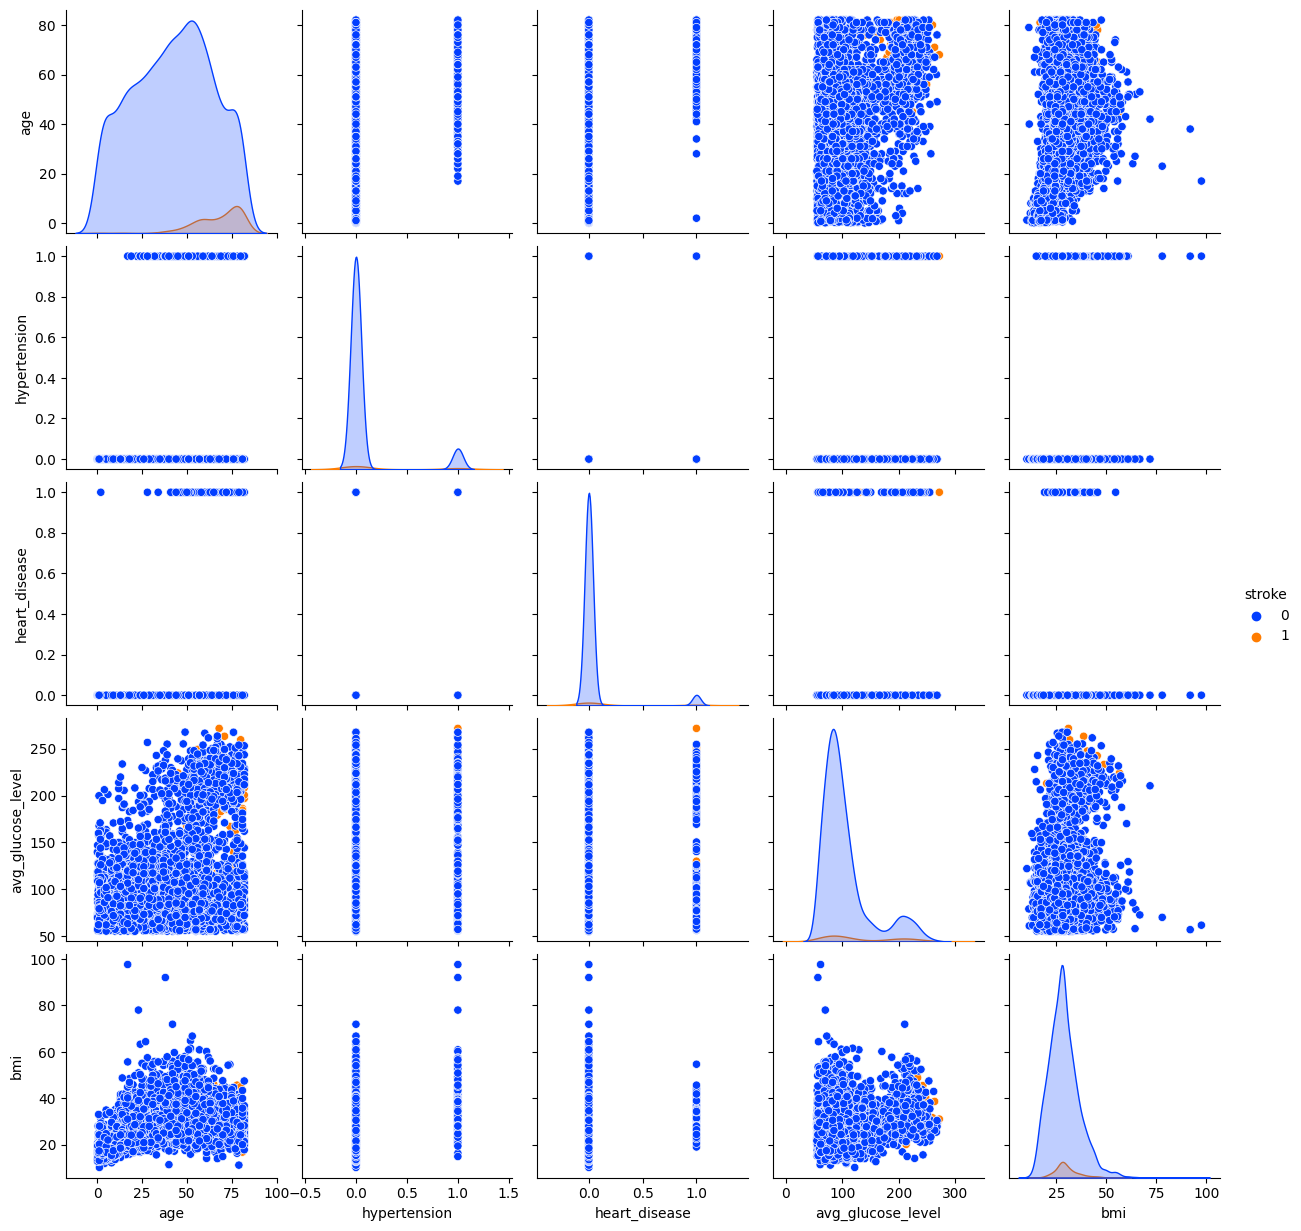

In [66]:
sns.pairplot(data,hue='stroke',palette='bright')
plt.show()

In [67]:
import pandas as pd

# Assuming 'data' is your DataFrame with a 'BMI' column
data['bmi_category'] = pd.cut(data['bmi'],
                               bins=[-float('inf'), 18.5, 24.9, 29.9, float('inf')],
                               labels=['Underweight', 'Healthy Weight', 'Overweight', 'Obesity'])

weight_status_counts = data['bmi_category'].value_counts()
weight_status_counts

Obesity           1920
Overweight        1610
Healthy Weight    1231
Underweight        349
Name: bmi_category, dtype: int64

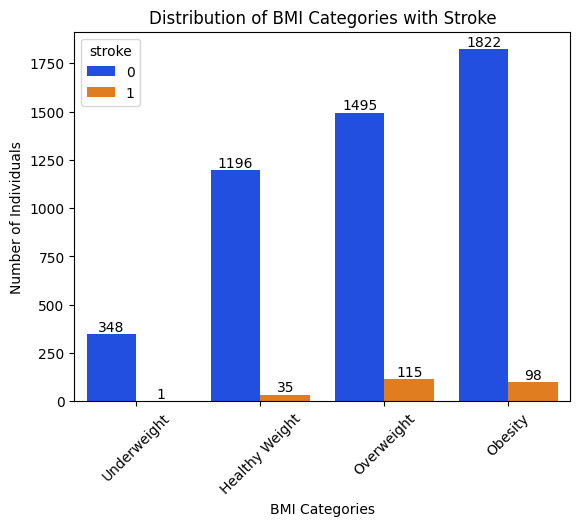

In [68]:

a=sns.countplot(x='bmi_category', hue='stroke', data=data,palette ='bright')
for label in a.containers:
    a.bar_label(label)


plt.xlabel('BMI Categories')
plt.ylabel('Number of Individuals')
plt.title('Distribution of BMI Categories with Stroke')


plt.xticks(rotation=45)


plt.show()


In [69]:
data.drop('bmi_category',inplace=True,axis=1)

In [70]:
stroke_positive=data[data['stroke']==1]


In [71]:
stroke_positive.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.0
mean,67.728193,0.265060,0.188755,132.544739,30.090361,1.0
std,12.727419,0.442254,0.392102,61.921056,5.861877,0.0
min,1.320000,0.000000,0.000000,56.110000,16.900000,1.0
25%,59.000000,0.000000,0.000000,79.790000,27.000000,1.0
50%,71.000000,0.000000,0.000000,105.220000,28.100000,1.0
75%,78.000000,1.000000,0.000000,196.710000,32.500000,1.0
max,82.000000,1.000000,1.000000,271.740000,56.600000,1.0


Text(0.5, 1.0, 'People Affected by Stroke: Distribution by Age and Gender')

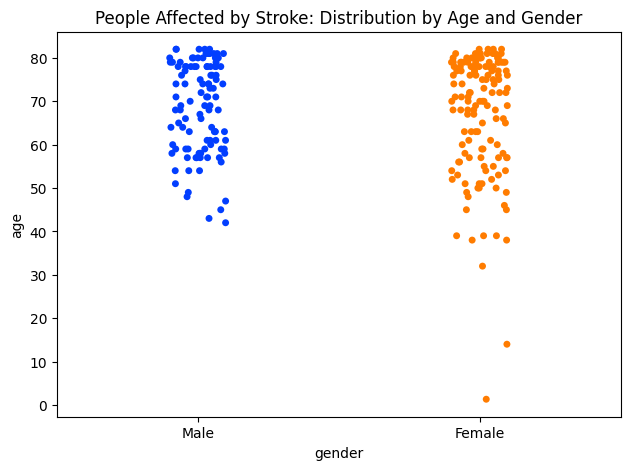

In [72]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2,1)
sns.stripplot( data=stroke_positive,x = "gender", y = "age",palette='bright')
plt.title('People Affected by Stroke: Distribution by Age and Gender')


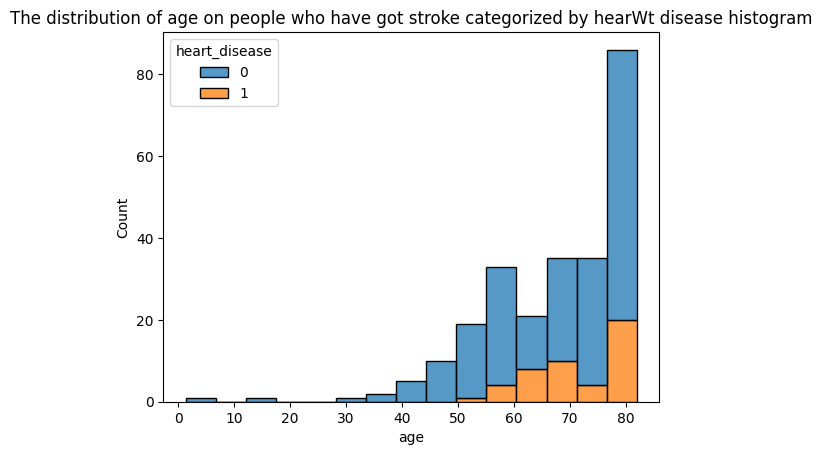

In [73]:
sns.histplot(data=stroke_positive,x='age',hue='heart_disease',multiple='stack',bins=15)
plt.title('The distribution of age on people who have got stroke categorized by hearWt disease histogram')
plt.show()

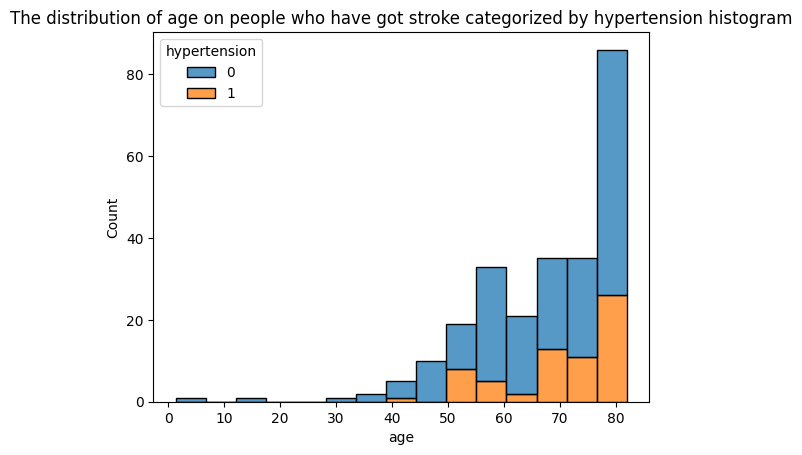

In [74]:
sns.histplot(data=stroke_positive,x='age',hue='hypertension',multiple='stack',bins=15)
plt.title('The distribution of age on people who have got stroke categorized by hypertension histogram')
plt.show()

# Data Preprocessing

Encode categorical variables

In [75]:
stroke=data.copy()

In [76]:
 from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
columns_encode= ['gender', 'work_type', 'ever_married', 'Residence_type', 'smoking_status']
stroke[columns_encode] = stroke[columns_encode].apply(label_encoder.fit_transform)

In [77]:
stroke.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [78]:
x=stroke.drop(['stroke'],axis=1)

In [79]:
y=stroke['stroke']

# Data Splitting

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2, random_state = 20)

 identifying the best feature

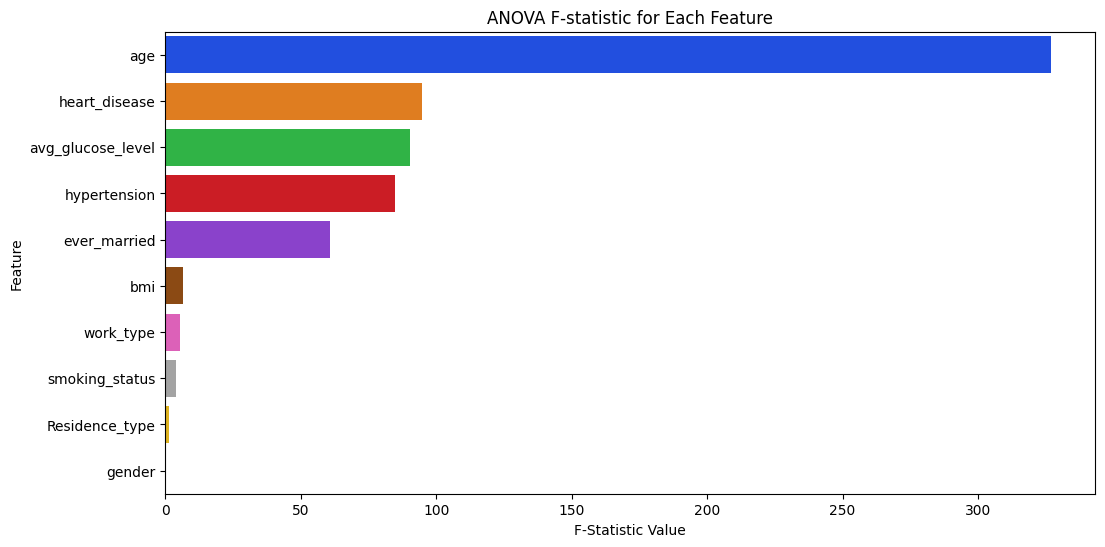

In [81]:
from sklearn.feature_selection import f_classif
f_statistic, p_values = f_classif(x, y)
feature_stats = pd.DataFrame({'Feature': x.columns, 'F_Statistic': f_statistic, 'P_Value': p_values})
feature_stats = feature_stats.sort_values(by='F_Statistic', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='F_Statistic', y='Feature', data=feature_stats, palette='bright')
plt.title('ANOVA F-statistic for Each Feature')
plt.xlabel('F-Statistic Value')
plt.ylabel('Feature')
plt.show()

age is identified as the most influential feature in predicting or explaining the target variable

# Feature Scaling

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

continuous_features = ['age', 'avg_glucose_level', 'bmi']
X_train_continuous = X_train[continuous_features]
X_test_continuous = X_test[continuous_features]
scaler = StandardScaler()
X_train_continuous_scaled = scaler.fit_transform(X_train_continuous)
X_test_continuous_scaled = scaler.transform(X_test_continuous)
X_train[continuous_features] = X_train_continuous_scaled
X_test[continuous_features] = X_test_continuous_scaled


In [83]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train_smote,Y_train_smote=smote.fit_resample(X_train,Y_train)
from collections import Counter
print("Before SMOTE",Counter(Y_train))
print("After SMOTE",Counter(Y_train_smote))

Before SMOTE Counter({0: 3895, 1: 193})
After SMOTE Counter({0: 3895, 1: 3895})


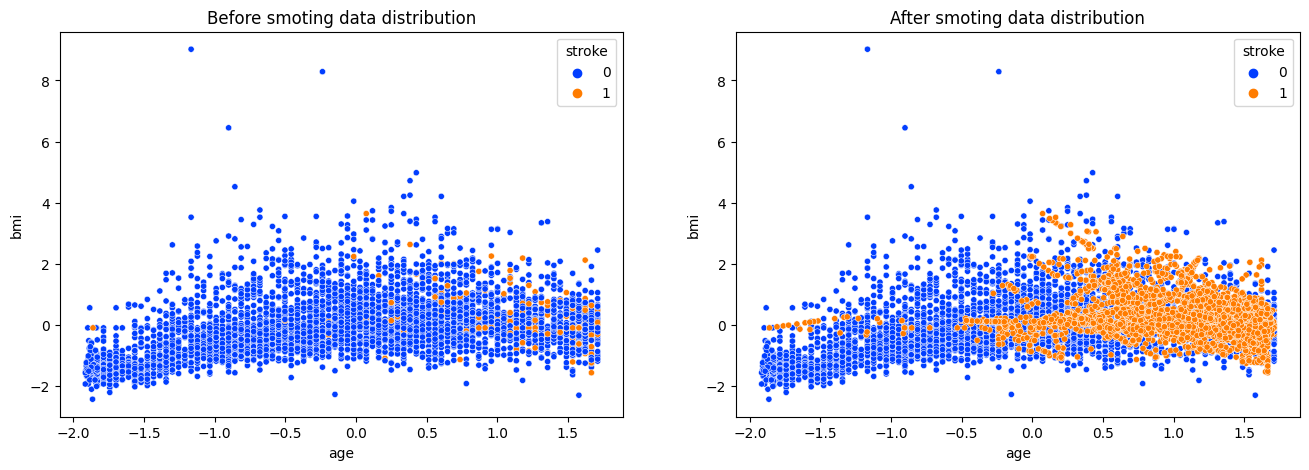

In [84]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2,1)
sns.scatterplot(x='age', y='bmi', hue='stroke', data=pd.concat([X_train, Y_train], axis=1), s=20, palette='bright')
plt.title('Before smoting data distribution')
plt.subplot(1, 2,2)
sns.scatterplot(x='age', y='bmi', hue='stroke', data=pd.concat([X_train_smote, Y_train_smote], axis=1), s=20, palette='bright')
plt.title('After smoting data distribution')
plt.show()

# MACHINE LEARNING

# Model Selection
1)Logistic Regression
2)Decision Tree Classifier
3)Random Forest Classifier
4)SVC
5)Gaussian NAIVE BAYES
6)K Neighbors Classifier

# Model Training ,Model Evaluation and Hyperparameter Tuning

In [85]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Logistic Regression

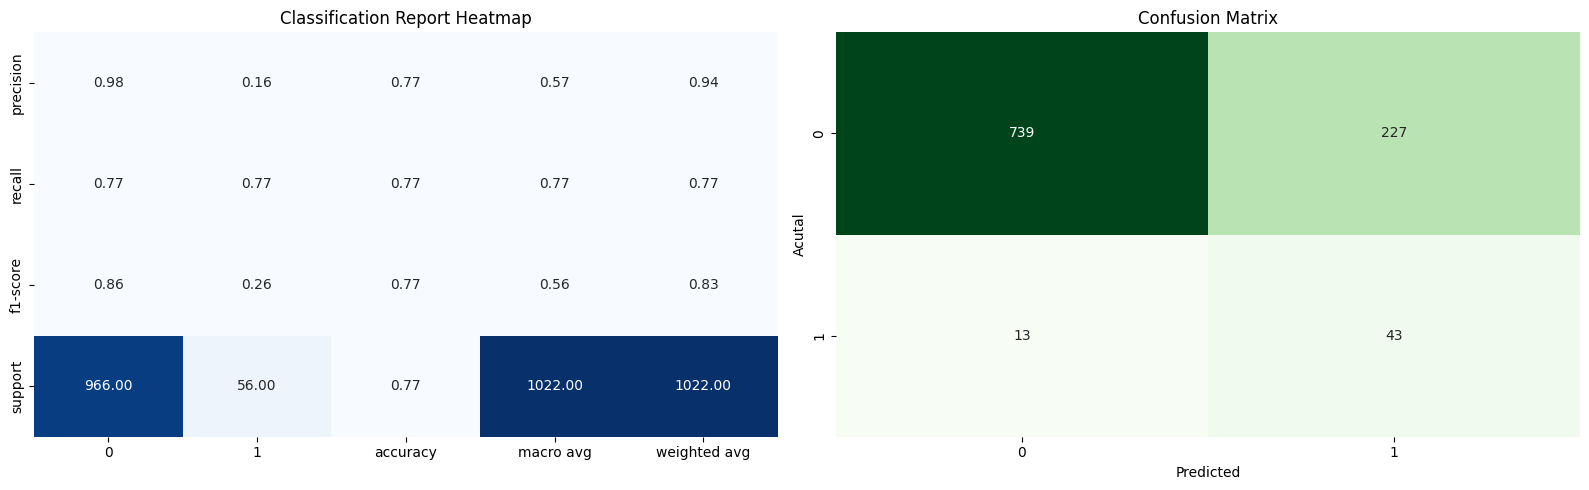

Accuracy Score: 0.7651663405088063


In [86]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(max_iter=1000, random_state=42)
logistic.fit(X_train_smote,Y_train_smote)
Y_pred_test=logistic.predict(X_test)
accuracy_score_logistic=accuracy_score(Y_test,Y_pred_test)
report = classification_report(Y_test, Y_pred_test,output_dict=True)
df_report = pd.DataFrame(report)

plt.figure(figsize=(16, 5))
plt.subplot(1, 2,1)
sns.heatmap(df_report, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title('Classification Report Heatmap')
plt.tight_layout()
plt.subplot(1, 2,2)
cm = confusion_matrix(Y_test, Y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Acutal')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
print("Accuracy Score:", accuracy_score_logistic)

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0,0.003,0.005,0.01,0.1, 1.0, 10.0]
}
clf= GridSearchCV(logistic, param_grid, cv=5)
clf.fit(X_train_smote,Y_train_smote)
clf.cv_results_
result=pd.DataFrame(clf.cv_results_)
min_rank_row=result.loc[result['rank_test_score'].idxmin()]
selected_columns = ['params', 'rank_test_score', 'mean_test_score']
print(min_rank_row[selected_columns])


params             {'C': 0.01, 'penalty': 'l2'}
rank_test_score                               1
mean_test_score                        0.786521
Name: 7, dtype: object


Accuracy Score for Logistic Regression: 0.7534246575342466


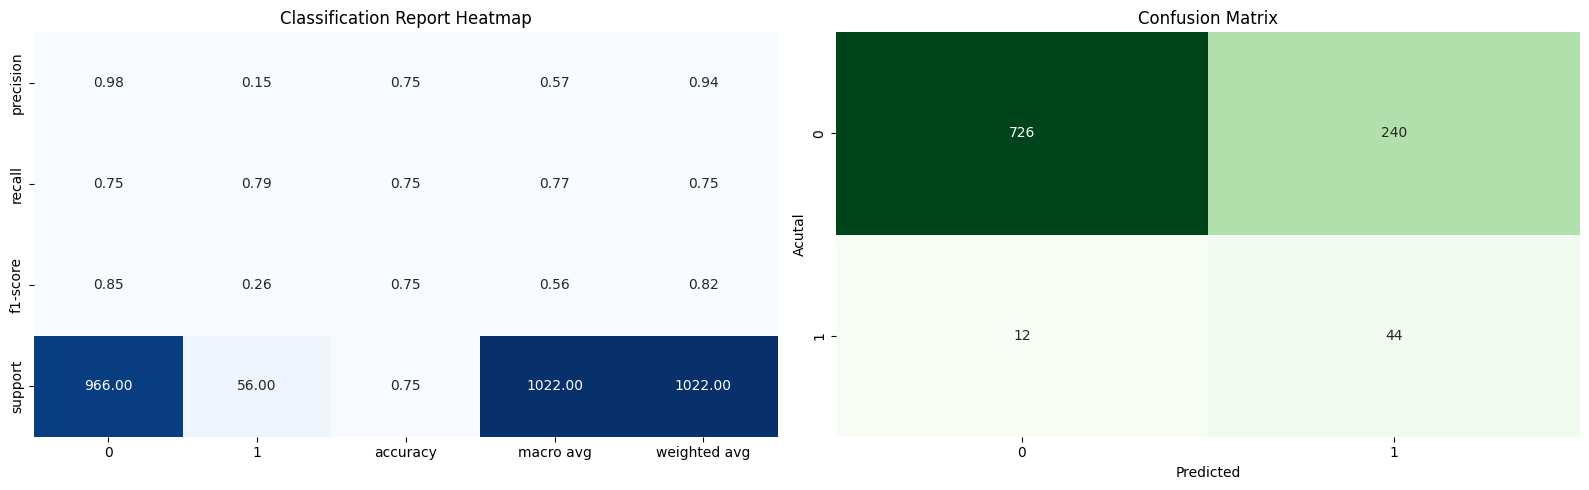

In [89]:
logistic=LogisticRegression(C=0.01,penalty='l2',max_iter=1000, random_state=42)
logistic.fit(X_train_smote,Y_train_smote)
Y_pred_test=logistic.predict(X_test)
accuracy_score_logistic=accuracy_score(Y_test,Y_pred_test)
report = classification_report(Y_test, Y_pred_test,output_dict=True)
df_report = pd.DataFrame(report)

plt.figure(figsize=(16, 5))
plt.subplot(1, 2,1)
sns.heatmap(df_report, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title('Classification Report Heatmap')
plt.tight_layout()
plt.subplot(1, 2,2)
cm = confusion_matrix(Y_test, Y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Acutal')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show
()
print("Accuracy Score for Logistic Regression:", accuracy_score_logistic)

Decision Tree Classifier

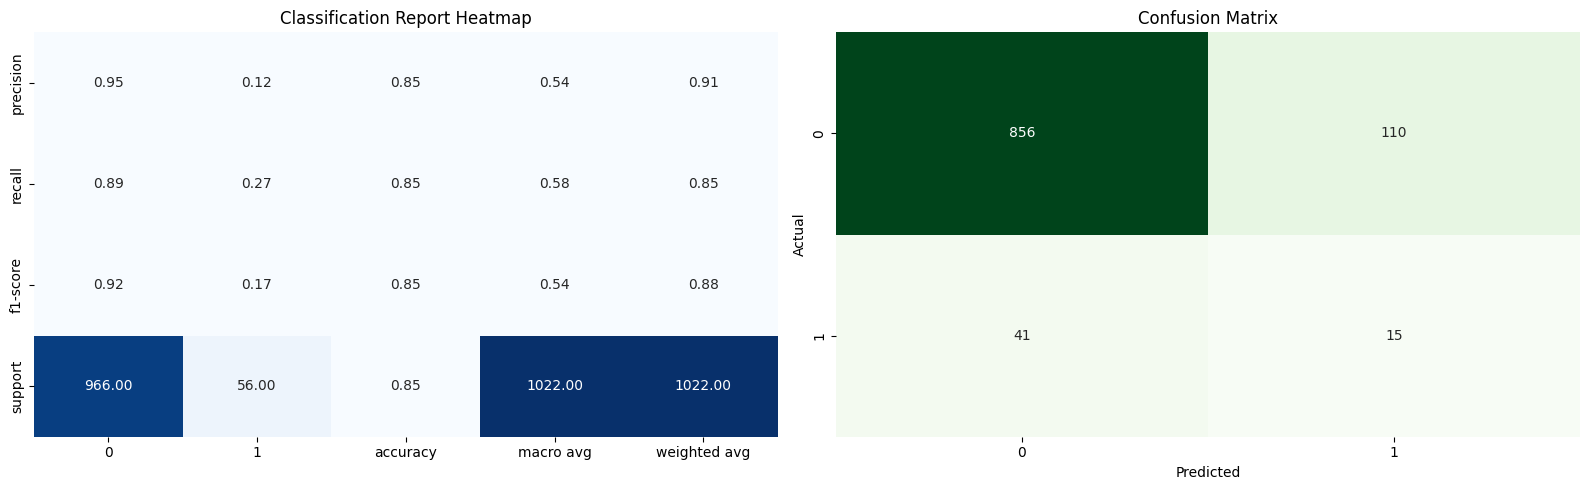

Accuracy Score for  Decision Tree : 0.8522504892367906


In [90]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',random_state=42)
dt.fit(X_train_smote,Y_train_smote)
Y_pred_test=dt.predict(X_test)
accuracy_score_DecisionTree=accuracy_score(Y_test,Y_pred_test)
report = classification_report(Y_test, Y_pred_test,output_dict=True)
df_report = pd.DataFrame(report)

plt.figure(figsize=(16, 5))
plt.subplot(1, 2,1)
sns.heatmap(df_report, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title('Classification Report Heatmap')
plt.tight_layout()
plt.subplot(1, 2,2)
cm = confusion_matrix(Y_test, Y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
print("Accuracy Score for  Decision Tree :", accuracy_score_DecisionTree)

Random Forest Classifier

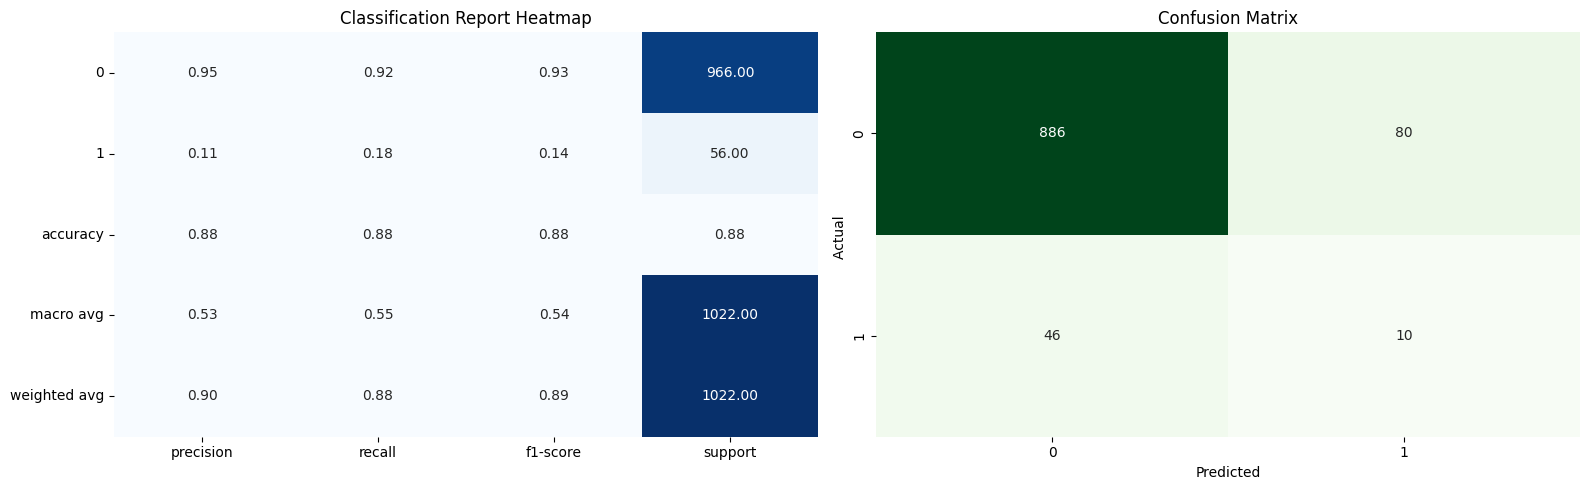

Accuracy Score: 0.8767123287671232


In [91]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train_smote,Y_train_smote)
Y_pred_test=rf.predict(X_test)
accuracy_score_RandomForest=accuracy_score(Y_test,Y_pred_test)

plt.figure(figsize=(16, 5))
plt.subplot(1, 2,1)
report = classification_report(Y_test, Y_pred_test,output_dict=True)
df_report = pd.DataFrame(report).transpose()
sns.heatmap(df_report, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title('Classification Report Heatmap')
plt.tight_layout()
plt.subplot(1, 2,2)
cm = confusion_matrix(Y_test, Y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual ')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
print("Accuracy Score:", accuracy_score_RandomForest)

In [92]:
param_grid = {
    'n_estimators': [50,200,1500]
}
clf = GridSearchCV(rf, param_grid, cv=5)
clf.fit(X_train_smote,Y_train_smote)
clf.cv_results_
result=pd.DataFrame(clf.cv_results_)
min_rank_row=result.loc[result['rank_test_score'].idxmin()]
selected_columns = ['params', 'rank_test_score', 'mean_test_score']
print(min_rank_row[selected_columns])

params             {'n_estimators': 1500}
rank_test_score                         1
mean_test_score                  0.941078
Name: 2, dtype: object


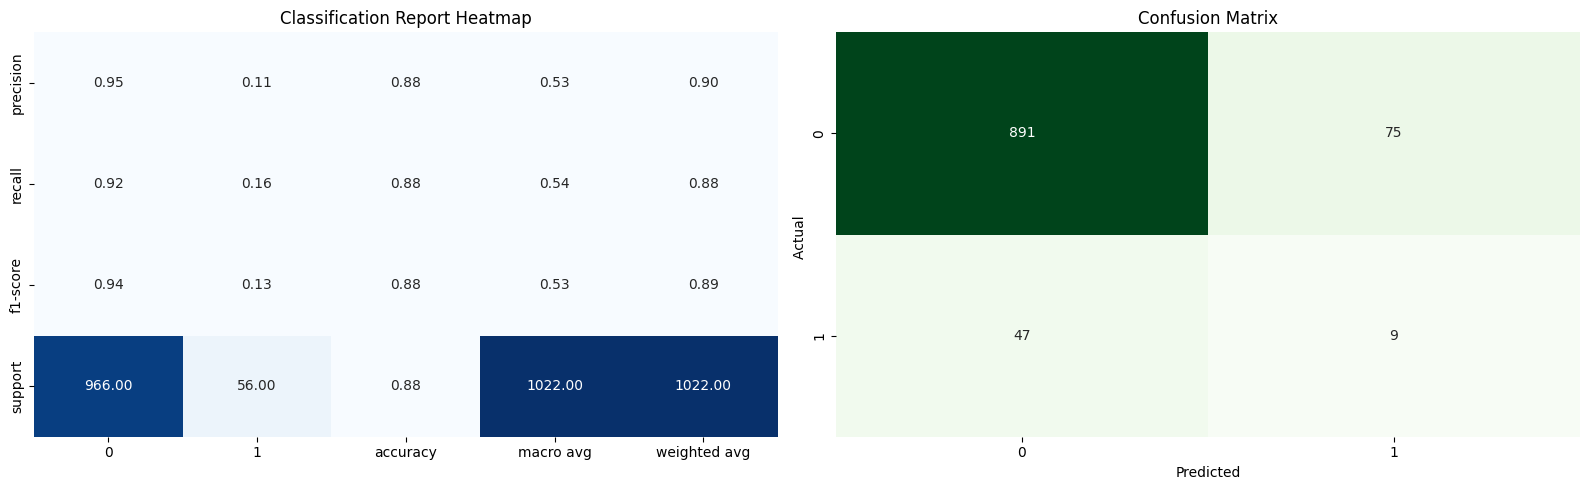

Accuracy Score for Random Forest: 0.8806262230919765


In [93]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,random_state=42)
rf.fit(X_train_smote,Y_train_smote)
Y_pred_test=rf.predict(X_test)
accuracy_score_RandomForest=accuracy_score(Y_test,Y_pred_test)
report = classification_report(Y_test, Y_pred_test,output_dict=True)
df_report = pd.DataFrame(report)

plt.figure(figsize=(16, 5))
plt.subplot(1, 2,1)
sns.heatmap(df_report, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title('Classification Report Heatmap')
plt.tight_layout()
plt.subplot(1, 2,2)
cm = confusion_matrix(Y_test, Y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual ')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
print("Accuracy Score for Random Forest:", accuracy_score_RandomForest)

SVC

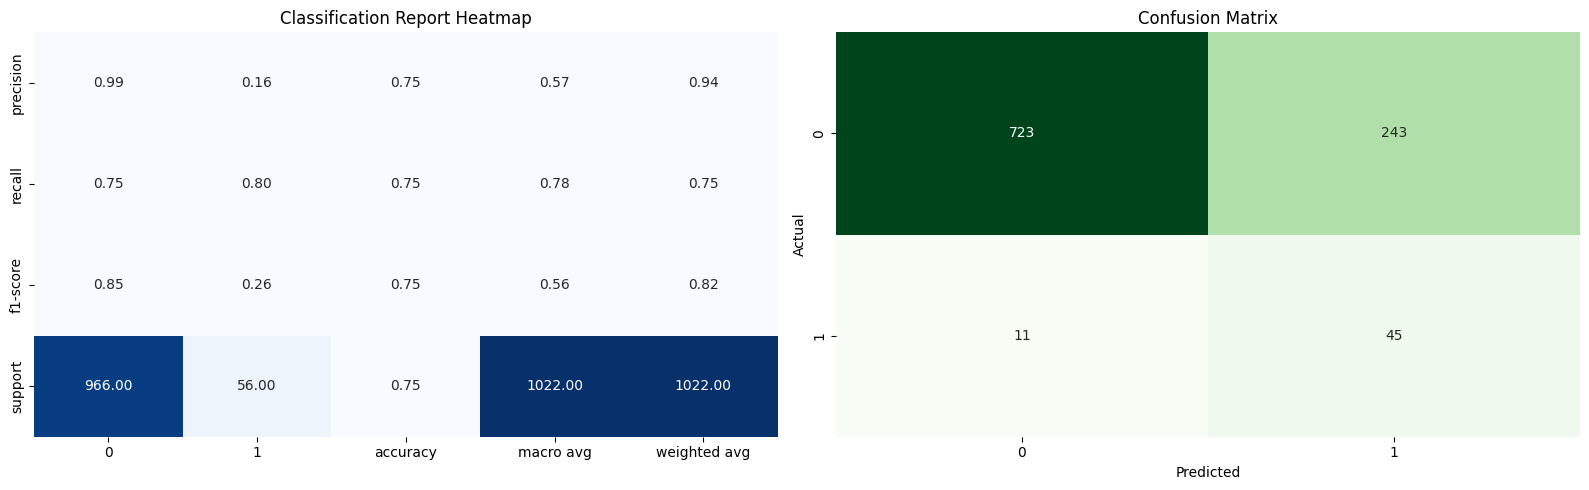

Accuracy Score: 0.7514677103718199


In [94]:
from sklearn.svm  import SVC
svc=SVC(kernel='linear',random_state=42)
svc.fit(X_train_smote,Y_train_smote)
Y_pred_test=svc.predict(X_test)
accuracy_score_svc=accuracy_score(Y_test,Y_pred_test)
report = classification_report(Y_test, Y_pred_test,output_dict=True)
df_report = pd.DataFrame(report)

plt.figure(figsize=(16, 5))
plt.subplot(1, 2,1)
sns.heatmap(df_report, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title('Classification Report Heatmap')
plt.tight_layout()
plt.subplot(1, 2,2)
cm = confusion_matrix(Y_test, Y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
print("Accuracy Score:", accuracy_score_svc)

In [95]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(SVC(gamma='auto'),
                {
                    'C':[4,10,20],
                    'kernel':['rbf','linear']
                 },cv=5,return_train_score=False)
clf.fit(X_train_smote,Y_train_smote)
clf.cv_results_
result=pd.DataFrame(clf.cv_results_)
result[['param_C','param_kernel','mean_test_score','rank_test_score']]

,param_C,param_kernel,mean_test_score,rank_test_score
0,4,rbf,0.853915,3
1,4,linear,0.784981,5
2,10,rbf,0.865340,2
3,10,linear,0.784981,5
4,20,rbf,0.872272,1
5,20,linear,0.785109,4


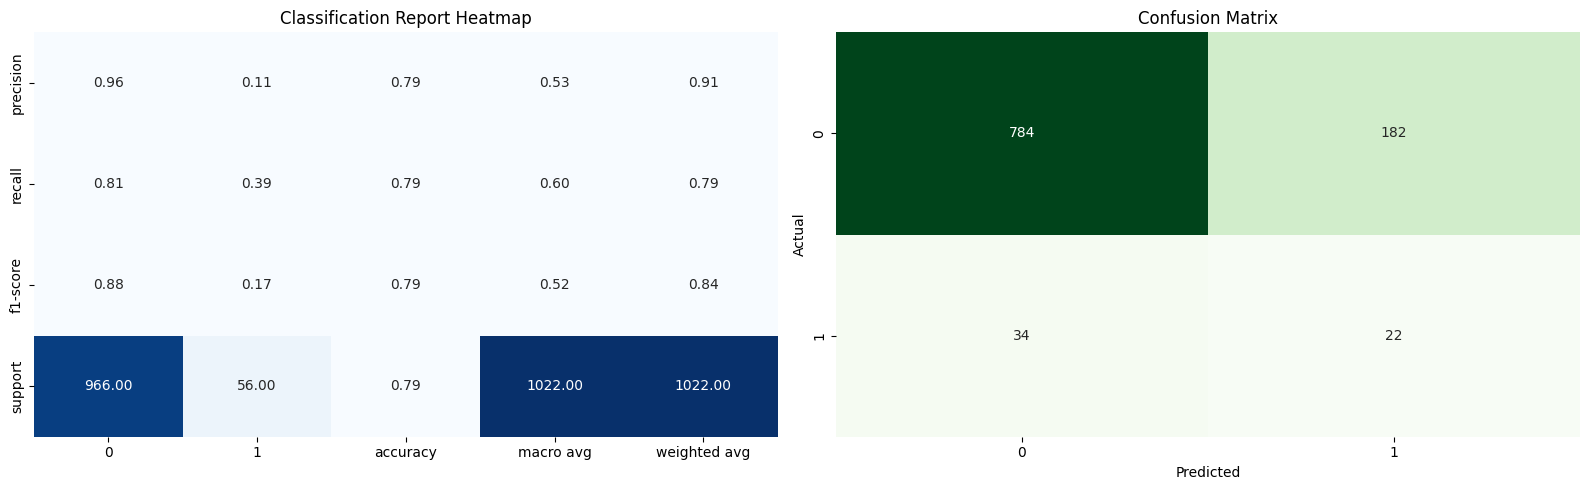

Accuracy Score for SVC: 0.7886497064579256


In [96]:
svc=SVC(kernel='rbf',C=20,random_state=42)
svc.fit(X_train_smote,Y_train_smote)
Y_pred_test=svc.predict(X_test)
accuracy_score_svc=accuracy_score(Y_test,Y_pred_test)
report = classification_report(Y_test, Y_pred_test,output_dict=True)
df_report = pd.DataFrame(report)

plt.figure(figsize=(16, 5))
plt.subplot(1, 2,1)
sns.heatmap(df_report, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title('Classification Report Heatmap')
plt.tight_layout()
plt.subplot(1, 2,2)
cm = confusion_matrix(Y_test, Y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
print("Accuracy Score for SVC:", accuracy_score_svc)

Gaussian NAIVE BAYES

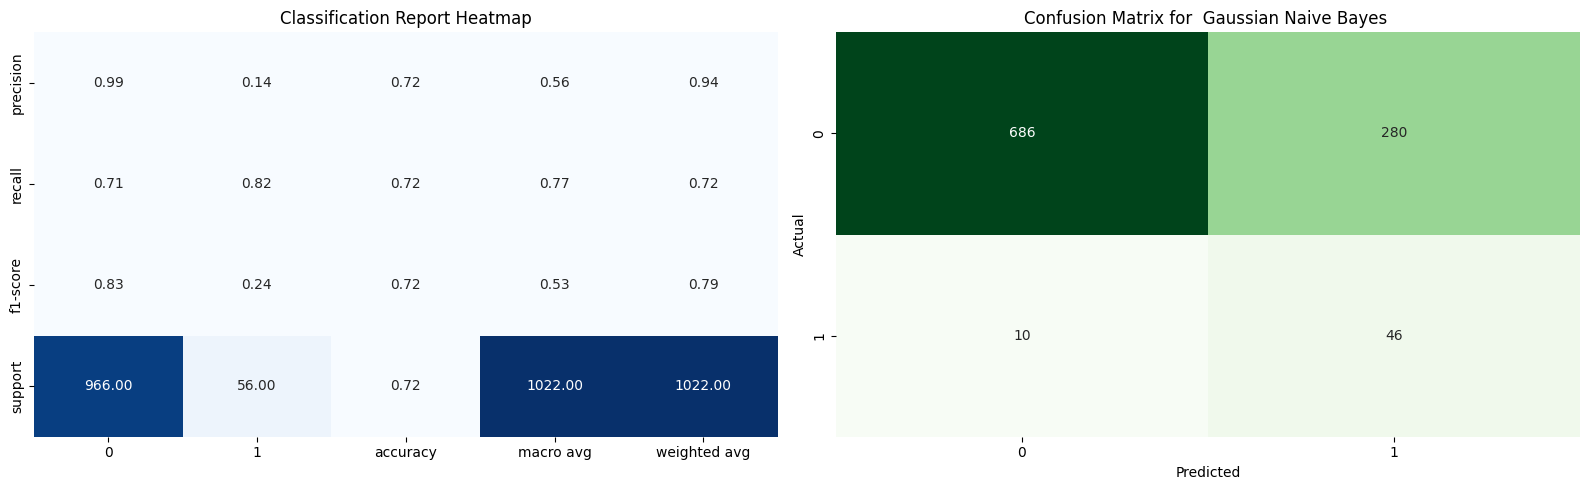

Accuracy Score for Gaussian Naive Bayes: 0.7162426614481409


In [97]:
from sklearn.naive_bayes import GaussianNB
gbn=GaussianNB()
gbn.fit(X_train_smote,Y_train_smote)
Y_pred_test=gbn.predict(X_test)
accuracy_score_GaussianNB=accuracy_score(Y_test,Y_pred_test)
report = classification_report(Y_test, Y_pred_test,output_dict=True)
df_report = pd.DataFrame(report)

plt.figure(figsize=(16, 5))
plt.subplot(1, 2,1)
sns.heatmap(df_report, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title('Classification Report Heatmap')
plt.tight_layout()
plt.subplot(1, 2,2)
cm = confusion_matrix(Y_test, Y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for  Gaussian Naive Bayes ')
plt.tight_layout()
plt.show()
print("Accuracy Score for Gaussian Naive Bayes:", accuracy_score_GaussianNB)

KNeighbors Classifier

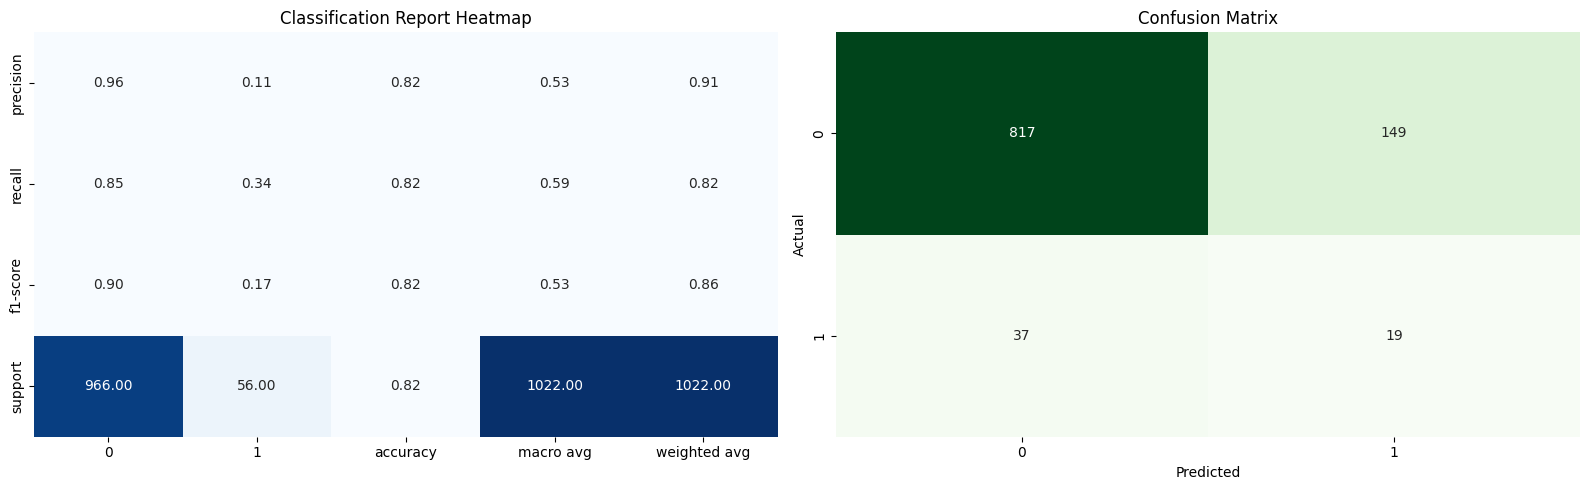

Accuracy Score: 0.8180039138943248


In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_smote,Y_train_smote)
Y_pred_test=knn.predict(X_test)
accuracy_score_KNeighborsClassifier=accuracy_score(Y_test,Y_pred_test)
report = classification_report(Y_test, Y_pred_test,output_dict=True)
df_report = pd.DataFrame(report)

plt.figure(figsize=(16, 5))
plt.subplot(1, 2,1)
sns.heatmap(df_report, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title('Classification Report Heatmap')
plt.tight_layout()
plt.subplot(1, 2,2)
cm = confusion_matrix(Y_test, Y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
print("Accuracy Score:", accuracy_score_KNeighborsClassifier)

In [99]:
param_grid = {
    'n_neighbors': range(2,15)
}
clf = GridSearchCV(knn, param_grid, cv=5, return_train_score=False)
clf.fit(X_train_smote, Y_train_smote)
clf.cv_results_
result=pd.DataFrame(clf.cv_results_)
result[['param_n_neighbors','mean_test_score','rank_test_score']]


,param_n_neighbors,mean_test_score,rank_test_score
0,2,0.914891,1
1,3,0.894737,3
2,4,0.900513,2
3,5,0.883569,5
4,6,0.888190,4
5,7,0.873299,7
6,8,0.878306,6
7,9,0.864827,9
8,10,0.867522,8
9,11,0.856739,12


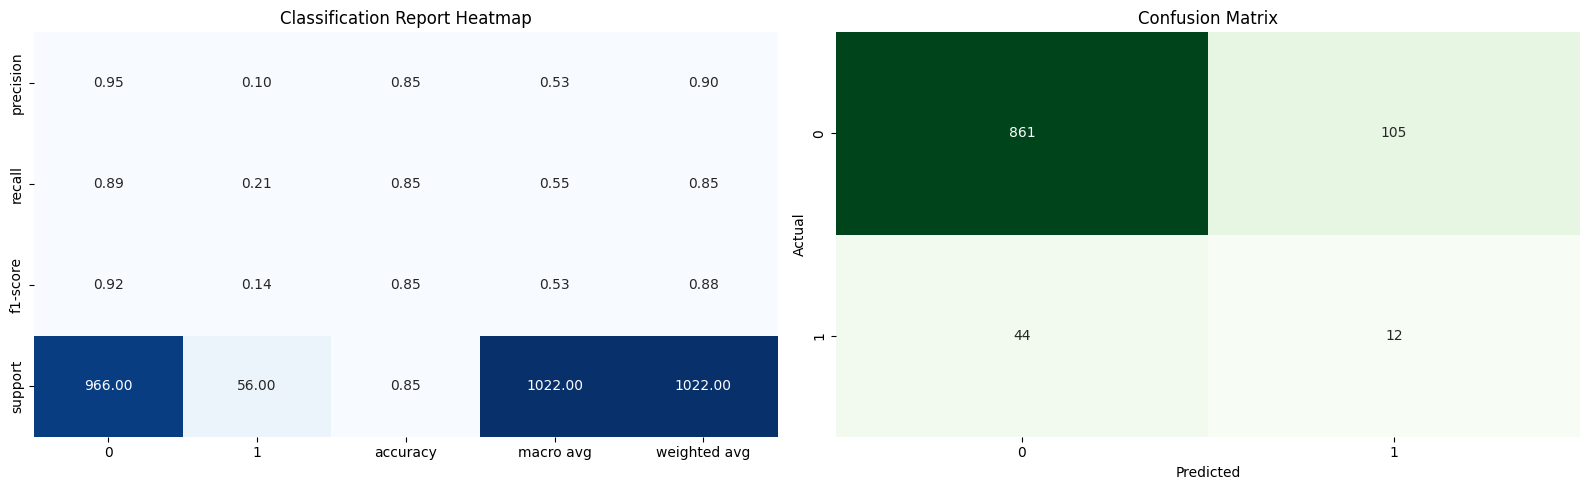

Accuracy Score for KNeighbors Classifier : 0.8542074363992173


In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_smote,Y_train_smote)
Y_pred_test=knn.predict(X_test)
accuracy_score_KNeighborsClassifier=accuracy_score(Y_test,Y_pred_test)
report = classification_report(Y_test, Y_pred_test,output_dict=True)
df_report = pd.DataFrame(report)

plt.figure(figsize=(16, 5))
plt.subplot(1, 2,1)
sns.heatmap(df_report, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title('Classification Report Heatmap')
plt.tight_layout()
plt.subplot(1, 2,2)
cm = confusion_matrix(Y_test, Y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
print("Accuracy Score for KNeighbors Classifier :", accuracy_score_KNeighborsClassifier)

# Model Evaluation: Summary through Visualization

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

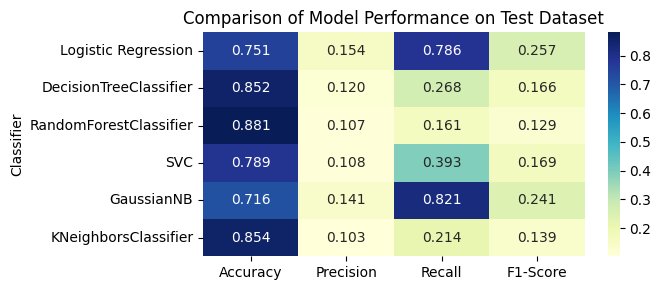

In [102]:
classifiers=[
('Logistic Regression',LogisticRegression(C=0.01,solver='liblinear',penalty='l2',max_iter=1000, random_state=42)),
( 'DecisionTreeClassifier',DecisionTreeClassifier(criterion='gini',random_state=42)),
('RandomForestClassifier',RandomForestClassifier(n_estimators=200,random_state=42)) ,
('SVC',SVC(kernel='rbf',C=20,random_state=42)),
('GaussianNB',GaussianNB()),
('KNeighborsClassifier',KNeighborsClassifier(n_neighbors=2))
]

results = []
for name, clf in classifiers:
    clf.fit(X_train_smote, Y_train_smote)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)

    results.append([name, accuracy, precision, recall, f1])
results_df = pd.DataFrame(results, columns=["Classifier", "Accuracy", "Precision", "Recall", "F1-Score"])
plt.figure(figsize=(7, 3))
sns.heatmap(results_df.set_index("Classifier"), annot=True, fmt=".3f", cmap="YlGnBu", xticklabels=["Accuracy", "Precision", "Recall", "F1-Score"])
plt.title("Comparison of Model Performance on Test Dataset")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Highest accuracy among all models XGBClassifier got the highest.
But here we want to prioritize recall, as it's generally more critical to correctly identify individuals at risk (minimize false negatives,want to prioritize recall, as it's generally more critical to correctly identify individuals at risk (minimize false negatives) than to be highly precise) than to be highly precise
so we will use.



recall, is a reasonable approach, especially if your main concern is minimizing false negatives. Recall, also known as sensitivity or true positive rate, is the proportion of actual positive instances that were correctly predicted by the model.

In [103]:
stroke.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
6,1,74.0,1,1,1,2,0,70.09,27.4,2,1
7,0,69.0,0,0,0,2,1,94.39,22.8,2,1
8,0,59.0,0,0,1,2,0,76.15,28.1,0,1
9,0,78.0,0,0,1,2,1,58.57,24.2,0,1


In [104]:
input = (1,67,0,1,1,2,1,228.69,36.6,1)
np_array=np.asarray(input)
ip_reshaped=np_array.reshape(1,-1)
prediction=gbn.predict(ip_reshaped)
print(prediction)
if(prediction[0]==0):
  print('The individual does not have a stroke')
else:
  print("The individual has had a stroke")

[1]
The individual has had a stroke


In [105]:

input = (0,50,0,0,0,4,1,108,30,1)
np_array=np.asarray(input)
ip_reshaped=np_array.reshape(1,-1)
prediction=gbn.predict(ip_reshaped)
print(prediction)
if(prediction[0]==0):
  print('The individual does not have a stroke')
else:
  print("The individual has had a stroke")

[0]
The individual does not have a stroke


In [106]:
import pickle

In [107]:
filename='stroke2_model.sav'

In [108]:
pickle.dump(gbn,open(filename,'wb'))

In [109]:
load_model=pickle.load(open('stroke2_model.sav','rb'))

In [110]:
load_model.score(X_test,Y_test)

0.7162426614481409

In [111]:
input = (1,67,0,1,1,2,1,228.69,36.6,1)
np_array=np.asarray(input)
ip_reshaped=np_array.reshape(1,-1)
prediction=load_model.predict(ip_reshaped)
print(prediction)
if(prediction[0]==0):
  print('The individual does not have a stroke')
else:
  print("The individual has had a stroke")

[1]
The individual has had a stroke
